
- Objective: Predict the future sale price of London houses based on their features.
- Type: Supervised regression
- Metric: Mean Absolute Error (MAE)

# 📌 Step 2: Import Libraries
Import essential Python libraries for data analysis, visualization, and modeling.

In [1]:
!pip install missingno
!pip install xgboost
!pip install tensorflow
!pip install keras

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor

# 📌 Step 3: Load the Data
- Load train.csv, test.csv, and sample_submission.csv
- Display basic info and head of each file

In [3]:
!git clone https://github.com/Victus0010/ML_homwwork.git
!ls ML_homwwork/data

Cloning into 'ML_homwwork'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 0), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 12.86 MiB | 15.13 MiB/s, done.
ls: cannot access 'ML_homwwork/data': No such file or directory


In [4]:
train=pd.read_csv('/content/ML_homwwork/Data/train.csv')
test=pd.read_csv('/content/ML_homwwork/Data/test.csv')

# sample=pd.read_csv('Data/sample_submission.csv')

train.head()

ID                            fullAddress postcode  country outcode  \
0   0       38 Adelina Grove, London, E1 3AD   E1 3AD  England      E1   
1   1      6 Cleveland Grove, London, E1 4XL   E1 4XL  England      E1   
2   2   65 Sanderstead Road, London, E10 7PW  E10 7PW  England     E10   
3   3  5 Queenswood Gardens, London, E11 3SE  E11 3SE  England     E11   
4   4     12 Woodlands Road, London, E11 4RW  E11 4RW  England     E11   

    latitude  longitude  bathrooms  bedrooms  floorAreaSqM  livingRooms  \
0  51.519406  -0.053261        NaN       3.0          80.0          1.0   
1  51.521261  -0.053384        2.0       4.0         110.0          1.0   
2  51.569054  -0.034892        1.0       3.0          84.0          1.0   
3  51.564212   0.026292        NaN       2.0          72.0          1.0   
4  51.563430   0.006260        1.0       3.0         104.0          1.0   

      tenure         propertyType currentEnergyRating  sale_month  sale_year  \
0   Freehold  Semi-Detached House                   C           1       1995   
1  Leasehold     Terrace Property                   D           1       1995   
2   Freehold     Terrace Property                   D           1       1995   
3  Leasehold   Purpose Built Flat                 NaN           1       1995   
4   Freehold    Mid Terrace House                   D           1       1995   

   price  
0  77000  
1  89995  
2  59000  
3  51500  
4  63500

In [5]:

print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (266325, 17)
Test data shape: (16547, 16)


In [6]:
train.describe()

ID       latitude      longitude      bathrooms  \
count  266325.000000  266325.000000  266325.000000  217846.000000   
mean   133162.000000      51.510090      -0.104639       1.439471   
std     76881.549558       0.056709       0.088074       0.721365   
min         0.000000      51.385708      -0.347055       1.000000   
25%     66581.000000      51.466685      -0.159167       1.000000   
50%    133162.000000      51.507202      -0.108622       1.000000   
75%    199743.000000      51.550937      -0.049202       2.000000   
max    266324.000000      51.665823       0.139249       9.000000   

            bedrooms   floorAreaSqM    livingRooms     sale_month  \
count  241482.000000  252519.000000  229285.000000  266325.000000   
mean        2.496140      99.624088       1.292160       6.805670   
std         1.172209      56.454683       0.583029       3.356693   
min         1.000000      10.000000       1.000000       1.000000   
25%         2.000000      63.000000       1.000000       4.000000   
50%         2.000000      85.000000       1.000000       7.000000   
75%         3.000000     118.000000       1.000000      10.000000   
max         9.000000     500.000000       9.000000      12.000000   

           sale_year         price  
count  266325.000000  2.663250e+05  
mean     2012.213855  6.161788e+05  
std         9.143113  1.274105e+06  
min      1995.000000  1.000000e+04  
25%      2004.000000  2.165000e+05  
50%      2014.000000  3.850000e+05  
75%      2021.000000  6.500000e+05  
max      2023.000000  1.000000e+08

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-null  float64
 10  livingRooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertyType         265817 non-null  object 
 13  currentEnergyRating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_year        

In [8]:
train.price.max()

100000000

In [9]:
train.price.min()

10000

In [10]:
print(train.duplicated().sum())
print(train.duplicated(subset="ID").sum())

0
0


#  Step 4: Exploratory Data Analysis (EDA)






- Understand target variable distribution (SalePrice)


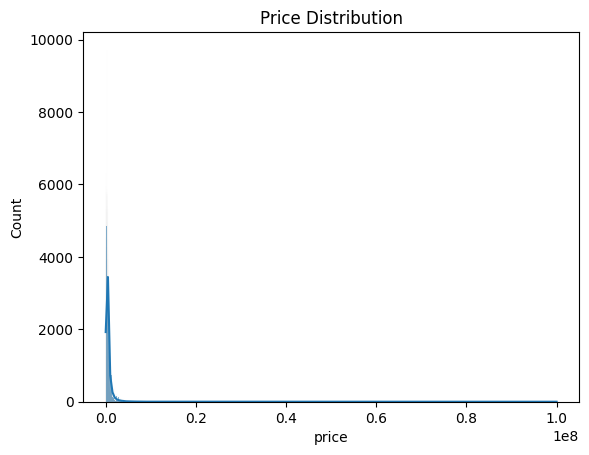

In [11]:
sns.histplot(train['price'], kde=True)
plt.title('Price Distribution')
plt.show()

- we got right skew (positive)


In [12]:

print ("Skew is:", train.price.skew())


Skew is: 22.805953953940016


Skew is: 0.13087902577090219


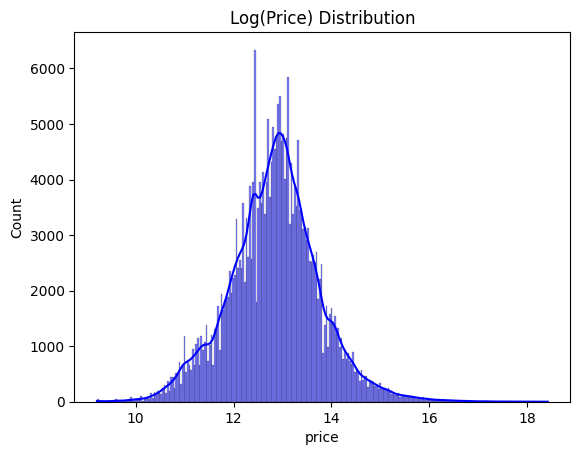

In [13]:
target = np.log1p(train.price)
print ("Skew is:", target.skew())
sns.histplot(target, color='blue',kde=True)
plt.title('Log(Price) Distribution')
plt.show()

- now we got normal distribution (tend to look like Gaussian )

In [14]:
orginal_price=train['price'].copy()


In [15]:
train['price'].head()

0    77000
1    89995
2    59000
3    51500
4    63500
Name: price, dtype: int64

In [16]:
# train['ID'].drop('ID')

* Working with Numeric Features

In [17]:
numerical_features = train.select_dtypes(include=[np.number])
print(numerical_features.dtypes)

numerical_features_withoutPrice = train.select_dtypes(include=[np.number]).columns.drop('price')


ID                int64
latitude        float64
longitude       float64
bathrooms       float64
bedrooms        float64
floorAreaSqM    float64
livingRooms     float64
sale_month        int64
sale_year         int64
price             int64
dtype: object


In [18]:
num_corr = numerical_features.corr()
print (num_corr['price'].sort_values(ascending=False))

price           1.000000
floorAreaSqM    0.481342
bathrooms       0.431295
livingRooms     0.312593
bedrooms        0.295716
sale_year       0.225839
ID              0.216174
latitude        0.009192
sale_month      0.004694
longitude      -0.137680
Name: price, dtype: float64


In [19]:
num_corr.corr()

ID  latitude  longitude  bathrooms  bedrooms  \
ID            1.000000 -0.182048  -0.051307  -0.388371 -0.419215   
latitude     -0.182048  1.000000  -0.165156  -0.188457 -0.226220   
longitude    -0.051307 -0.165156   1.000000  -0.626397 -0.477636   
bathrooms    -0.388371 -0.188457  -0.626397   1.000000  0.841477   
bedrooms     -0.419215 -0.226220  -0.477636   0.841477  1.000000   
floorAreaSqM -0.422991 -0.225673  -0.561944   0.904083  0.955094   
livingRooms  -0.428848 -0.173707  -0.421096   0.693641  0.800590   
sale_month   -0.082513 -0.137530  -0.036655  -0.305726 -0.333923   
sale_year     0.998843 -0.175876  -0.043969  -0.378209 -0.409803   
price         0.000458 -0.267358  -0.577039   0.623513  0.457480   

              floorAreaSqM  livingRooms  sale_month  sale_year     price  
ID               -0.422991    -0.428848   -0.082513   0.998843  0.000458  
latitude         -0.225673    -0.173707   -0.137530  -0.175876 -0.267358  
longitude        -0.561944    -0.421096   -0.036655  -0.043969 -0.577039  
bathrooms         0.904083     0.693641   -0.305726  -0.378209  0.623513  
bedrooms          0.955094     0.800590   -0.333923  -0.409803  0.457480  
floorAreaSqM      1.000000     0.843195   -0.340822  -0.412232  0.613921  
livingRooms       0.843195     1.000000   -0.334474  -0.419696  0.441766  
sale_month       -0.340822    -0.334474    1.000000  -0.124629 -0.317622  
sale_year        -0.412232    -0.419696   -0.124629   1.000000  0.016081  
price             0.613921     0.441766   -0.317622   0.016081  1.000000

- Correlation matrix

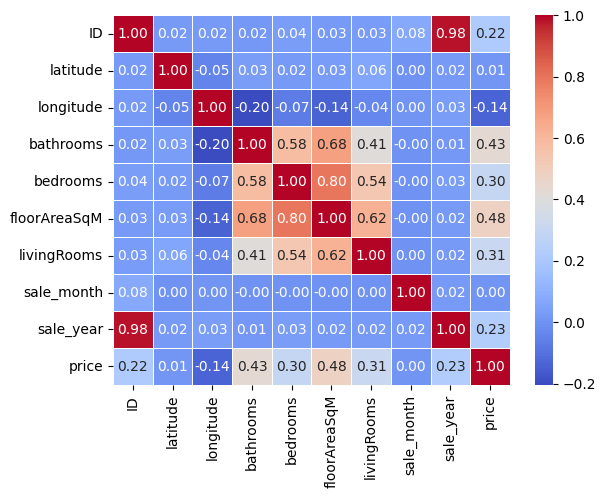

In [20]:
sns.heatmap(num_corr,
           cmap="coolwarm",
           linewidths=0.5,
           annot=True,
           fmt=".2f")

plt.show()

- Examine relationships between features and target

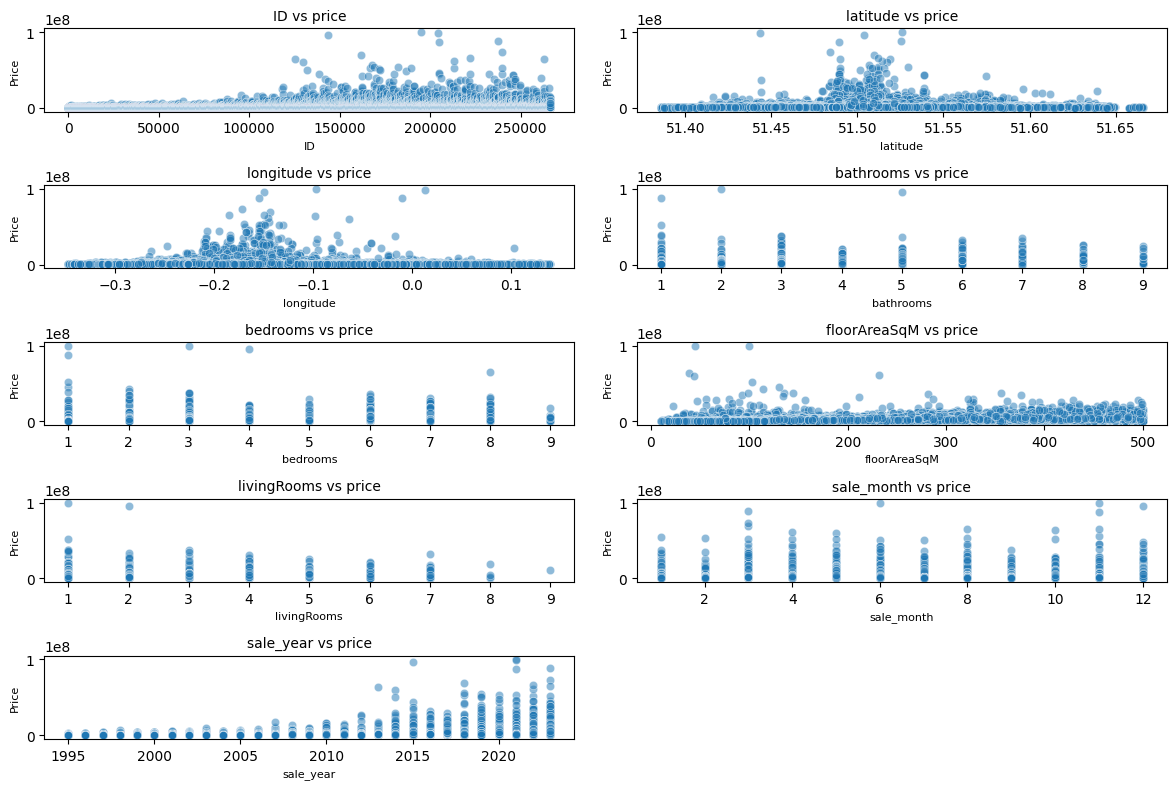

In [21]:
n_cols = 2  # Number of columns in the grid
n_rows = (len(numerical_features_withoutPrice) // n_cols) + 1  # Calculate rows needed

plt.figure(figsize=(12, 8))  # Adjust figure size for readability

# Loop through features and plot in subplots
for i, feature in enumerate(numerical_features_withoutPrice, 1):
    plt.subplot(n_rows, n_cols, i)  # Position in grid (rows, cols, index)
    sns.scatterplot(data=train, x=feature, y='price', alpha=0.5)  # Alpha for transparency
    plt.title(f'{feature} vs price', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Price', fontsize=8)

plt.tight_layout()  # Prevent overlapping labels
plt.show()

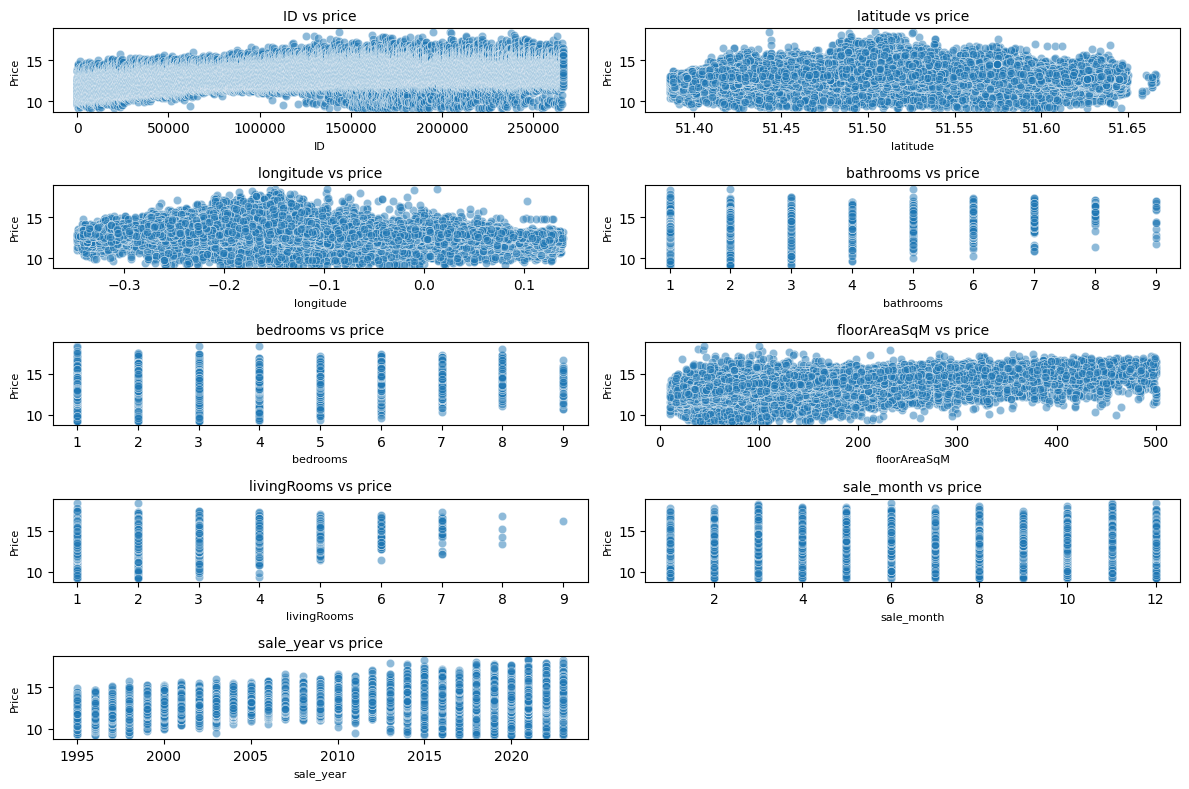

In [22]:
n_cols = 2  # Number of columns in the grid
n_rows = (len(numerical_features_withoutPrice) // n_cols) + 1  # Calculate rows needed

plt.figure(figsize=(12, 8))  # Adjust figure size for readability

# Loop through features and plot in subplots
for i, feature in enumerate(numerical_features_withoutPrice, 1):
    plt.subplot(n_rows, n_cols, i)  # Position in grid (rows, cols, index)
    sns.scatterplot(data=train, x=feature, y=target, alpha=0.5)  # Alpha for transparency
    plt.title(f'{feature} vs price', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Price', fontsize=8)

plt.tight_layout()  # Prevent overlapping labels
plt.show()

In [23]:
floorarea_pivot = train.pivot_table(index='floorAreaSqM',
                  values='price', aggfunc=np.mean)
floorarea_pivot

/tmp/ipython-input-23-3773200986.py:1: FutureWarning: The provided callable <function mean at 0x797332dda3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  floorarea_pivot = train.pivot_table(index='floorAreaSqM',


price
floorAreaSqM              
10.0          2.250412e+05
11.0          3.698107e+05
12.0          7.250000e+05
13.0          2.479667e+05
14.0          4.072500e+05
...                    ...
496.0         4.481250e+06
497.0         2.557075e+06
498.0         7.582065e+06
499.0         1.339667e+07
500.0         3.918133e+06

[488 rows x 1 columns]

- Visualize numerical features

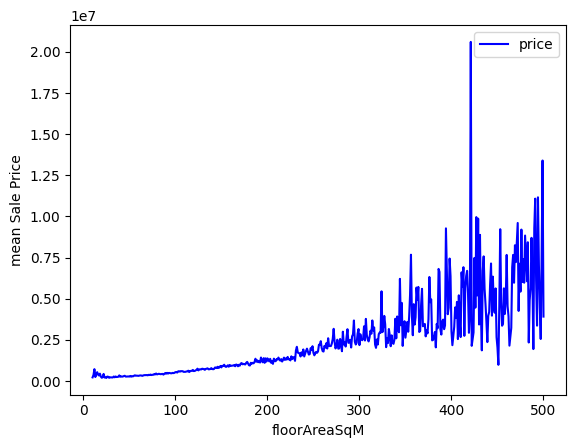

In [24]:
floorarea_pivot.plot(kind='line', color='blue')
plt.xlabel('floorAreaSqM')
plt.ylabel('mean Sale Price')
plt.xticks(rotation=0)
plt.show()

In [25]:
bathroomsnum_pivot = train.pivot_table(index='bathrooms',
                  values='price', aggfunc=np.mean)


/tmp/ipython-input-25-1621063736.py:1: FutureWarning: The provided callable <function mean at 0x797332dda3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  bathroomsnum_pivot = train.pivot_table(index='bathrooms',


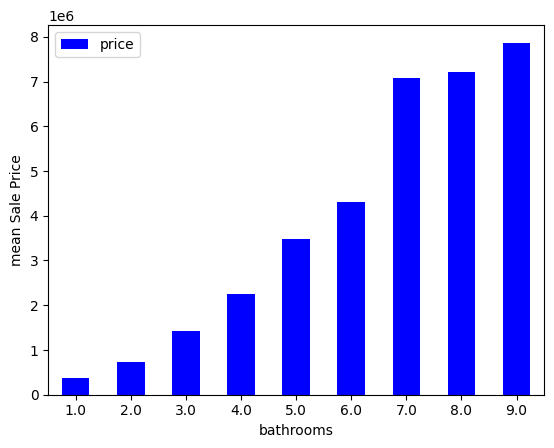

In [26]:
bathroomsnum_pivot.plot(kind='bar', color='blue',)
plt.xlabel('bathrooms')
plt.ylabel('mean Sale Price')
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-27-1857377935.py:1: FutureWarning: The provided callable <function mean at 0x797332dda3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  livingRooms_pivot = train.pivot_table(index='livingRooms',


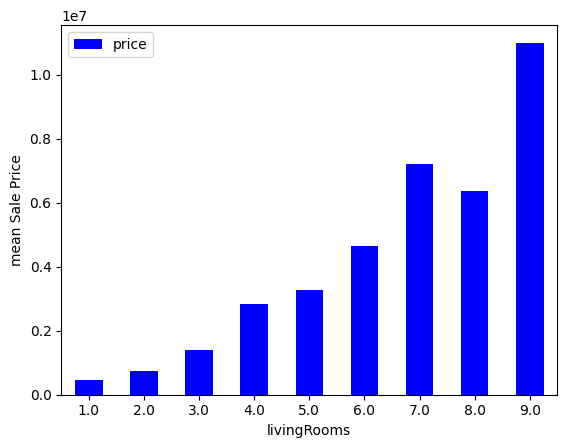

In [27]:
livingRooms_pivot = train.pivot_table(index='livingRooms',
                  values='price', aggfunc=np.mean)

livingRooms_pivot.plot(kind='bar', color='blue',)
plt.xlabel('livingRooms')
plt.ylabel('mean Sale Price')
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-28-3554520824.py:1: FutureWarning: The provided callable <function mean at 0x797332dda3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  bedrooms_pivot = train.pivot_table(index='bedrooms',


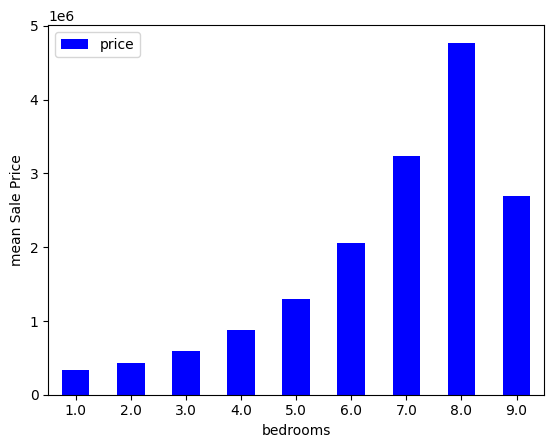

In [28]:
bedrooms_pivot = train.pivot_table(index='bedrooms',
                  values='price', aggfunc=np.mean)

bedrooms_pivot.plot(kind='bar', color='blue',)
plt.xlabel('bedrooms')
plt.ylabel('mean Sale Price')
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-29-1307346910.py:1: FutureWarning: The provided callable <function mean at 0x797332dda3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  saleyear_pivot = train.pivot_table(index='sale_year',


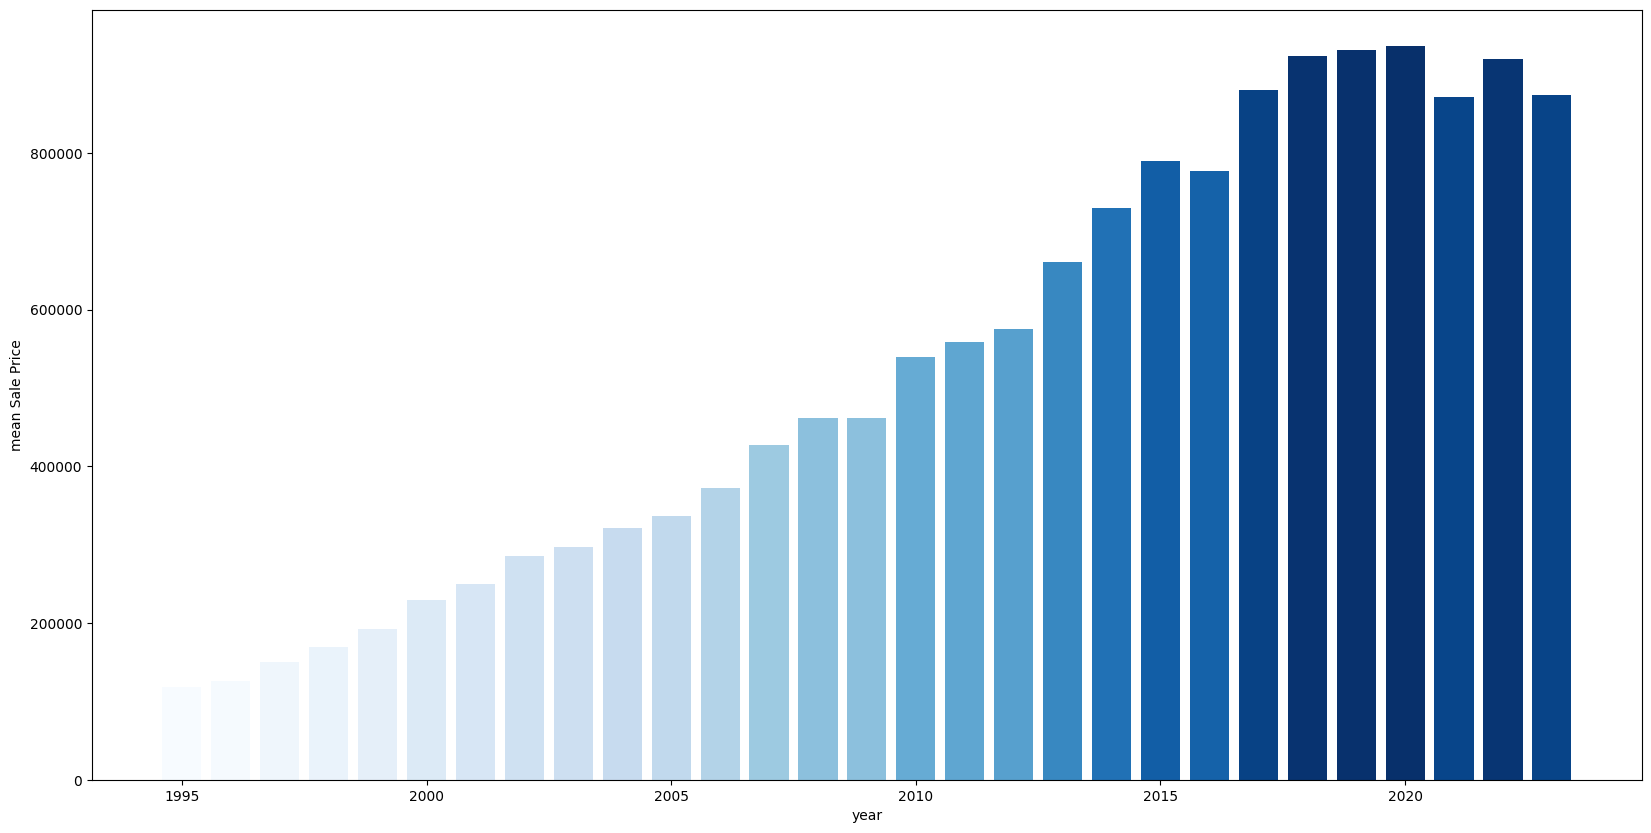

In [29]:
saleyear_pivot = train.pivot_table(index='sale_year',
                  values='price', aggfunc=np.mean)

norm = plt.Normalize(saleyear_pivot['price'].min(), saleyear_pivot['price'].max())
colors = plt.cm.Blues(norm(saleyear_pivot['price']))  # Use 'Blues' colormap (or try 'Reds', 'Greens')
plt.figure(figsize=(20, 10))
bars = plt.bar(saleyear_pivot.index, saleyear_pivot['price'], color=colors)
plt.xlabel('year')
plt.ylabel('mean Sale Price')
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-30-3442451812.py:1: FutureWarning: The provided callable <function mean at 0x797332dda3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  salemonth_pivot = train.pivot_table(index='sale_month', values='price', aggfunc=np.mean)


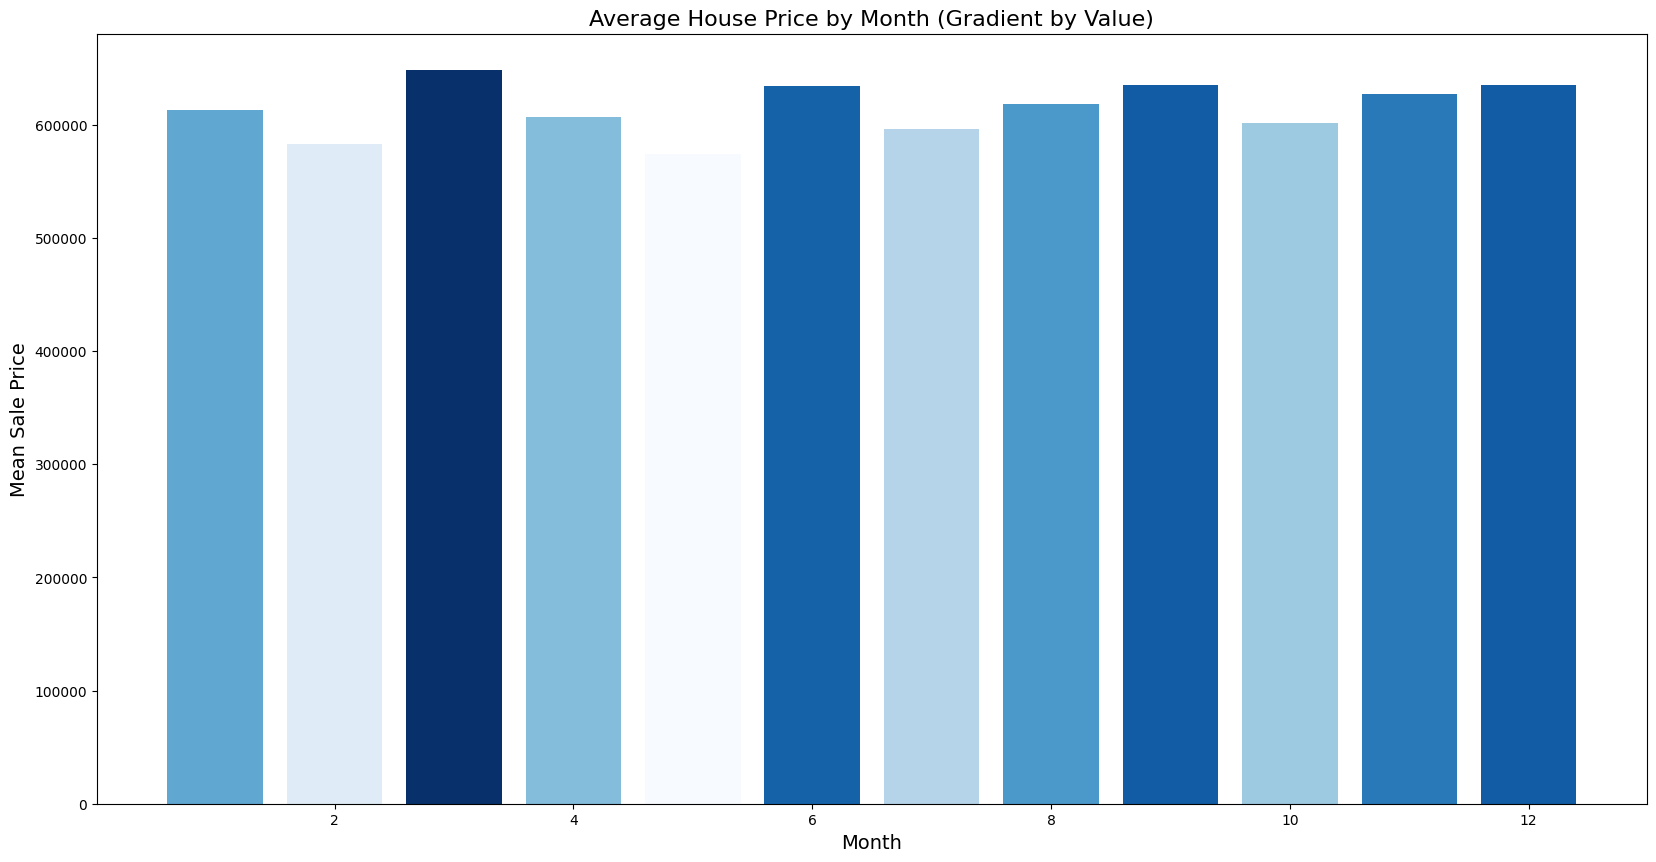

In [30]:
salemonth_pivot = train.pivot_table(index='sale_month', values='price', aggfunc=np.mean)

# Normalize values to range [0,1] for color mapping
norm = plt.Normalize(salemonth_pivot['price'].min(), salemonth_pivot['price'].max())
colors = plt.cm.Blues(norm(salemonth_pivot['price']))  # Use 'Blues' colormap (or try 'Reds', 'Greens')

# Plot with gradient colors
plt.figure(figsize=(20, 10))
bars = plt.bar(salemonth_pivot.index, salemonth_pivot['price'], color=colors)



# Customize labels and title
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean Sale Price', fontsize=14)
plt.xticks(rotation=0)
plt.title('Average House Price by Month (Gradient by Value)', fontsize=16)
plt.show()

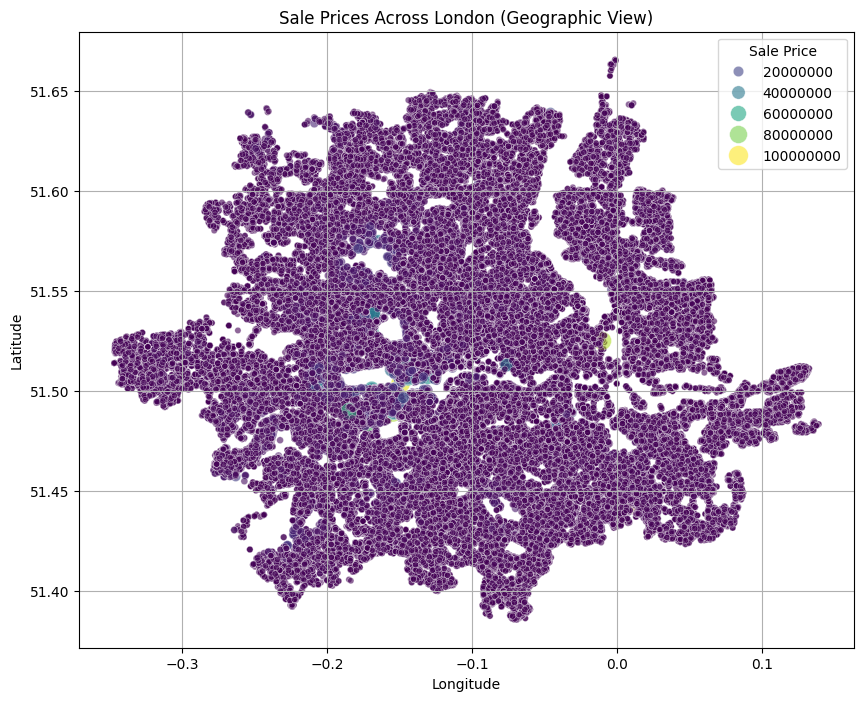

In [31]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=train,
    x='longitude',
    y='latitude',
    hue='price',
    palette='viridis',
    size='price',
    sizes=(20, 200),
    alpha=0.6
)
plt.title("Sale Prices Across London (Geographic View)")
plt.legend(title='Sale Price', loc='upper right')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


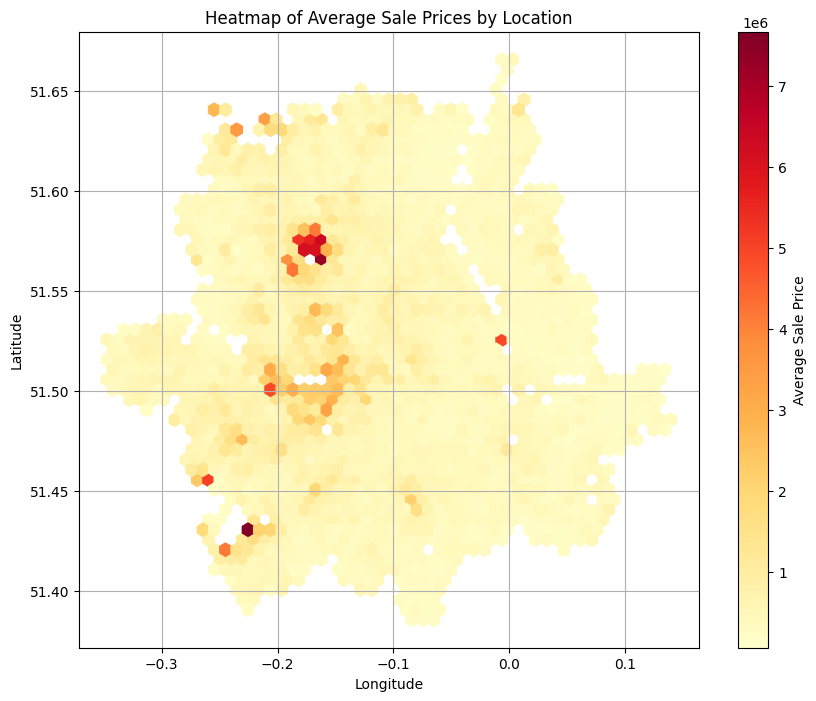

In [32]:
plt.figure(figsize=(10, 8))
plt.hexbin(
    train['longitude'],
    train['latitude'],
    C=train['price'],
    gridsize=50,
    # reduce_C_function=np.absolute,
    cmap='YlOrRd'
)
cb = plt.colorbar()
cb.set_label('Average Sale Price')
plt.title("Heatmap of Average Sale Prices by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [33]:
# train['LogPrice'] = np.log1p(train['price'])

# plt.figure(figsize=(10, 8))
# sns.scatterplot(
#     data=train,
#     x='longitude',
#     y='latitude',
#     hue='LogPrice',
#     palette='viridis',
#     size='LogPrice',
#     sizes=(20, 200),
#     alpha=0.6
# )
# plt.title("Log(Sale Price) Across London")
# plt.legend(title='Log(SalePrice)', loc='upper right')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.grid(True)
# plt.show()


In [34]:
train.floorAreaSqM

0          80.0
1         110.0
2          84.0
3          72.0
4         104.0
          ...  
266320     83.0
266321     69.0
266322     50.0
266323    130.0
266324      NaN
Name: floorAreaSqM, Length: 266325, dtype: float64

- Dealing with Categorical Features

In [35]:
categorical_features = train.select_dtypes(include=[np.object_]).columns
# catecategorical_features.dtypes
categorical_features

Index(['fullAddress', 'postcode', 'country', 'outcode', 'tenure',
       'propertyType', 'currentEnergyRating'],
      dtype='object')

In [36]:
train['currentEnergyRating'].value_counts().head(20)

currentEnergyRating
D    87925
C    78356
B    20836
E    20253
F     1519
G      436
A      186
Name: count, dtype: int64

- Visualize categorical features

Text(0.5, 1.0, 'Count of Address feature')

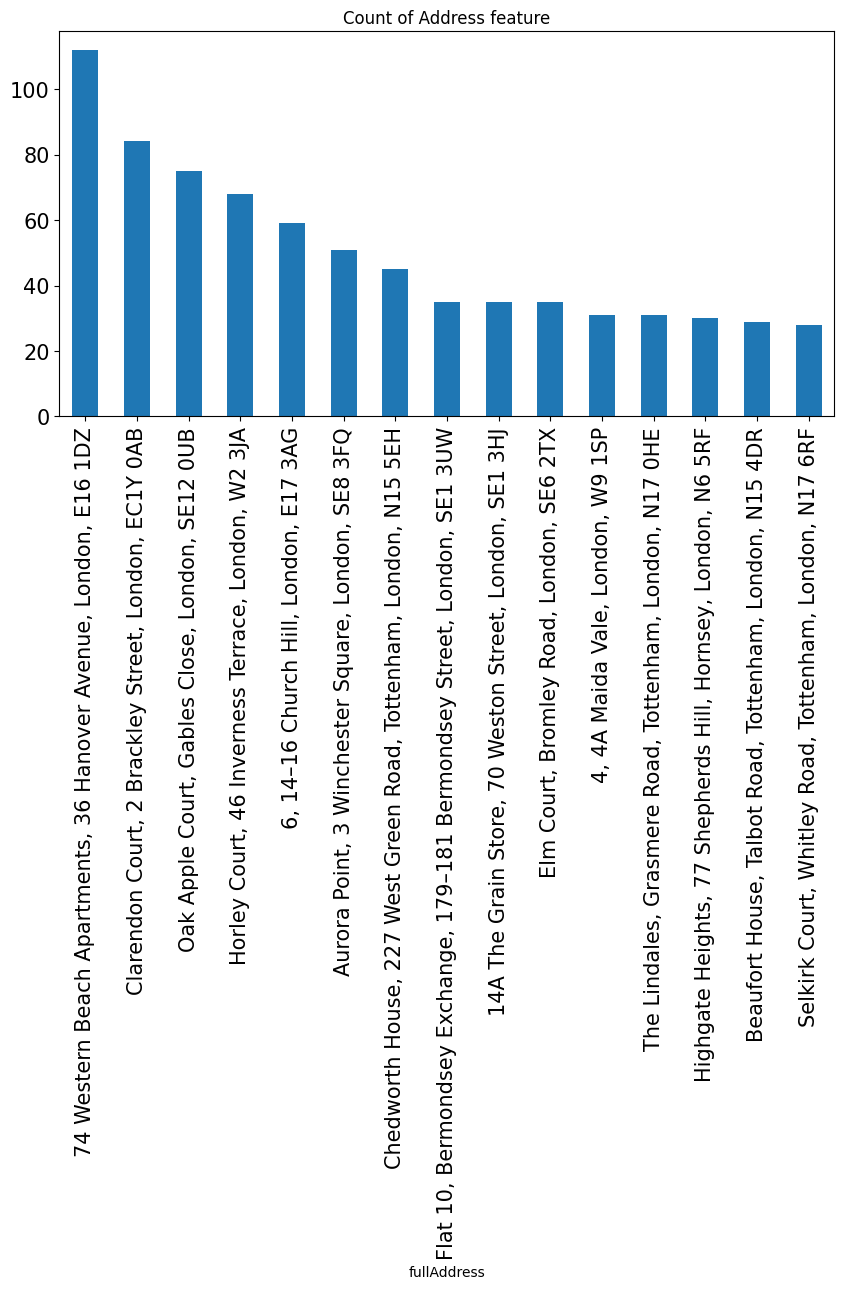

In [37]:
train['fullAddress'].value_counts().head(15).plot(kind='bar',figsize=(10,5),fontsize=15)
plt.title("Count of Address feature")


Text(0.5, 1.0, 'Count of Property Type feature')

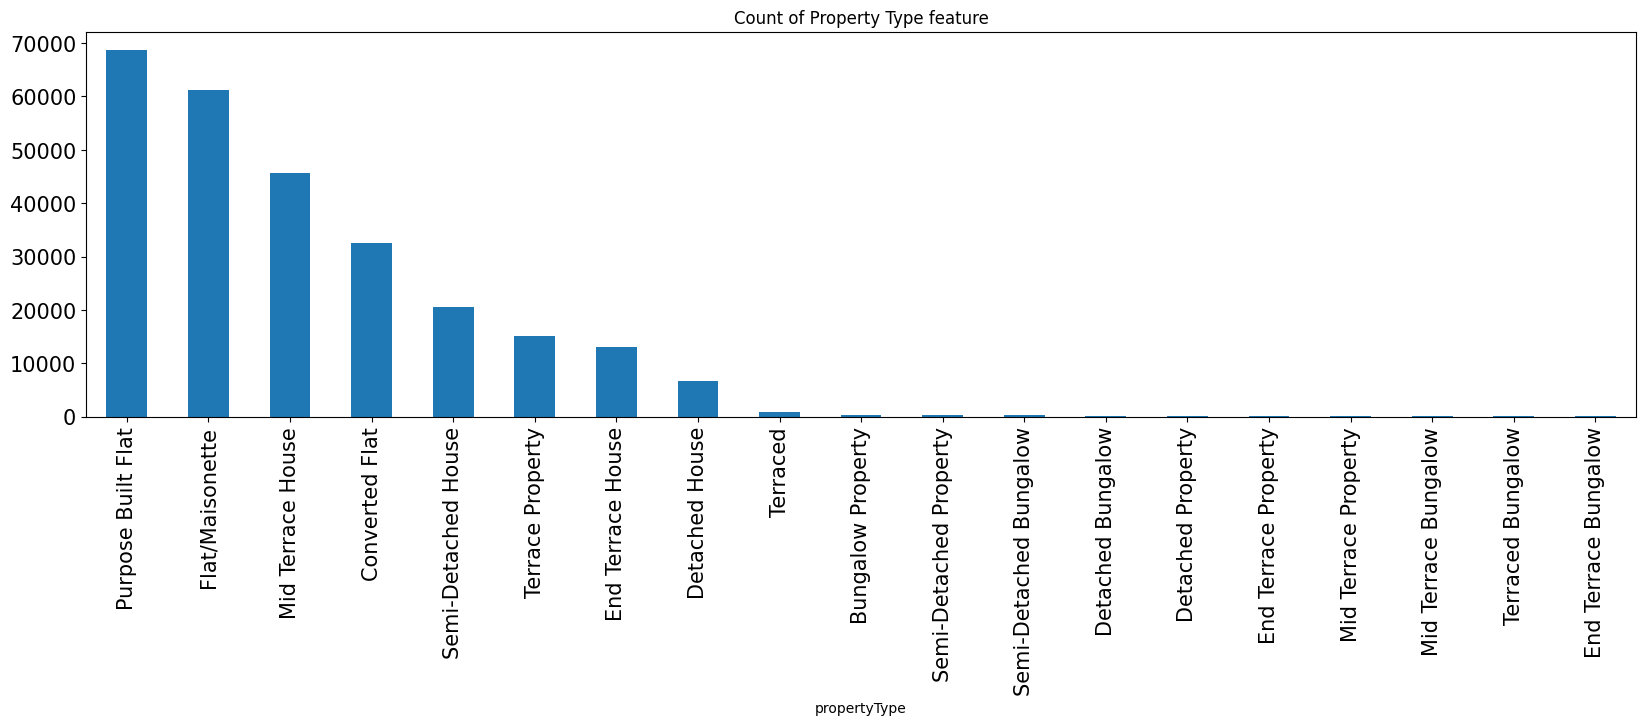

In [38]:
train['propertyType'].value_counts().plot(kind='bar',figsize=(20,5),fontsize=15)
plt.title("Count of Property Type feature")

Text(0.5, 1.0, 'Counts of Tenure feature')

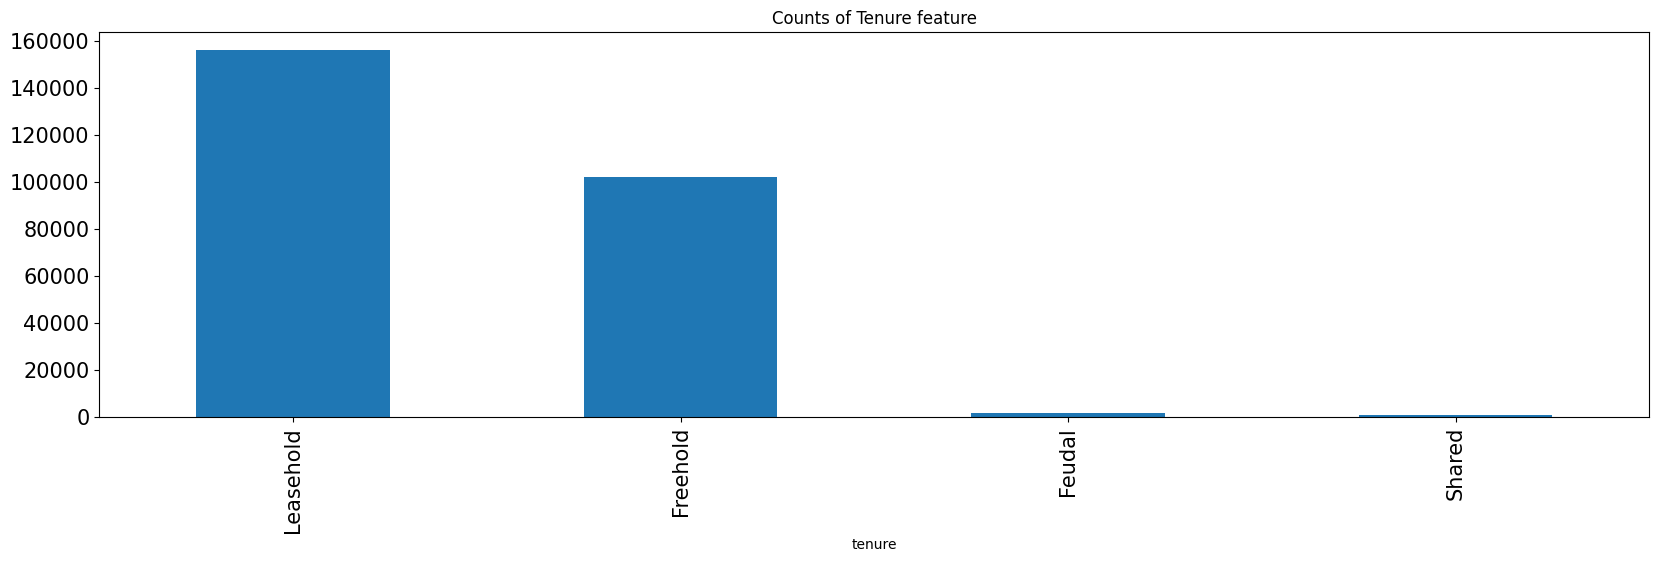

In [39]:
train['tenure'].value_counts().plot(kind='bar',figsize=(20,5),fontsize=15)
plt.title("Counts of Tenure feature")

Text(0.5, 1.0, 'Counts of postcode feature')

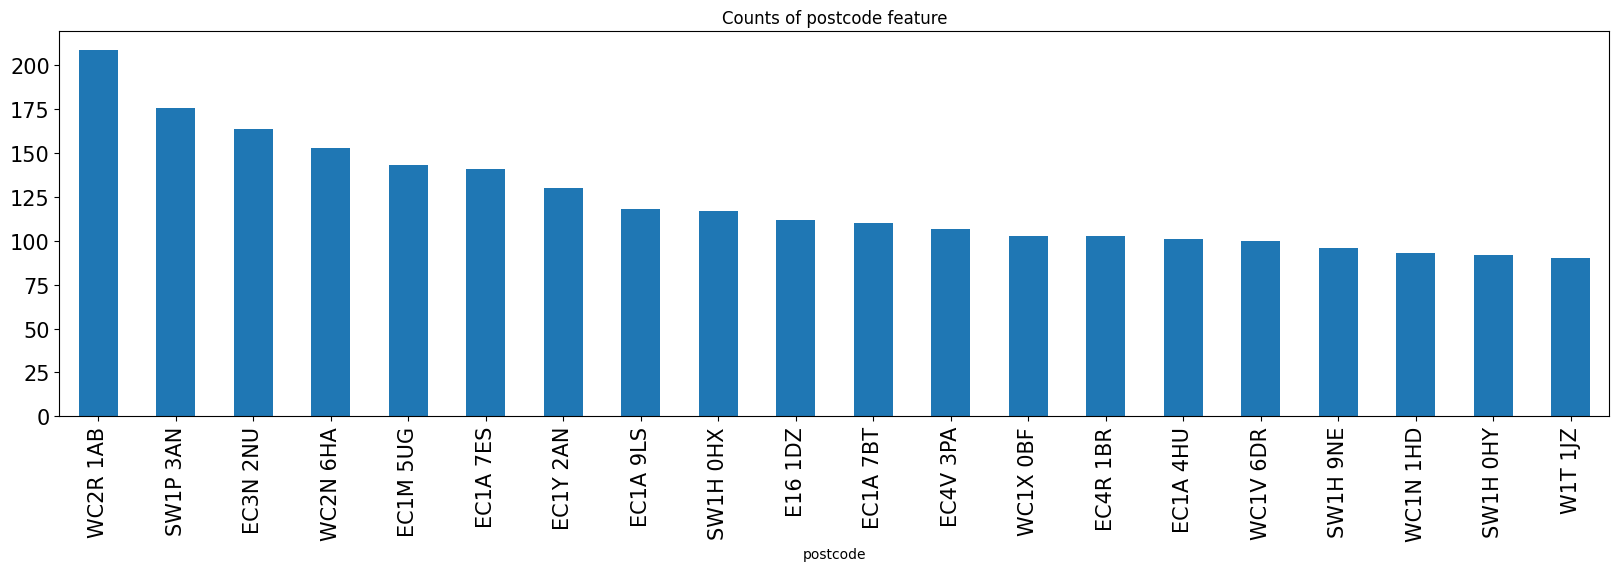

In [40]:
train['postcode'].value_counts().head(20).plot(kind='bar',figsize=(20,5),fontsize=15)
plt.title("Counts of postcode feature")

Text(0.5, 1.0, 'Counts of EnergyRating feature')

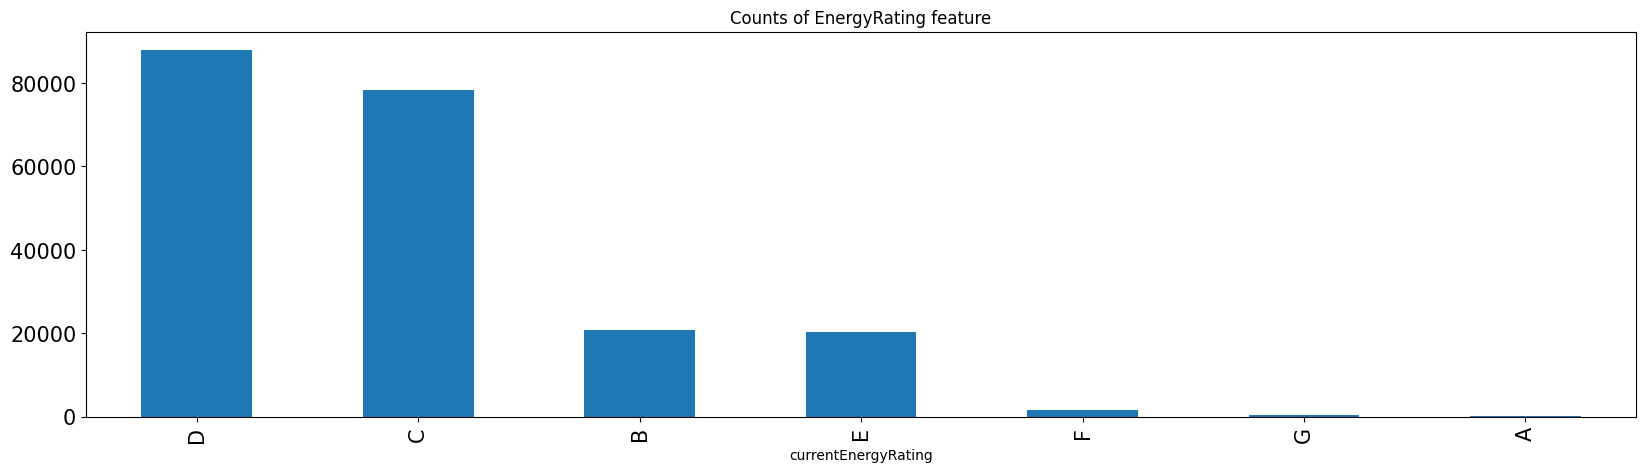

In [41]:
train['currentEnergyRating'].value_counts().plot(kind='bar',figsize=(20,5),fontsize=15)
plt.title("Counts of EnergyRating feature")

/tmp/ipython-input-42-227118800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='currentEnergyRating', y='sale_year', palette='viridis')


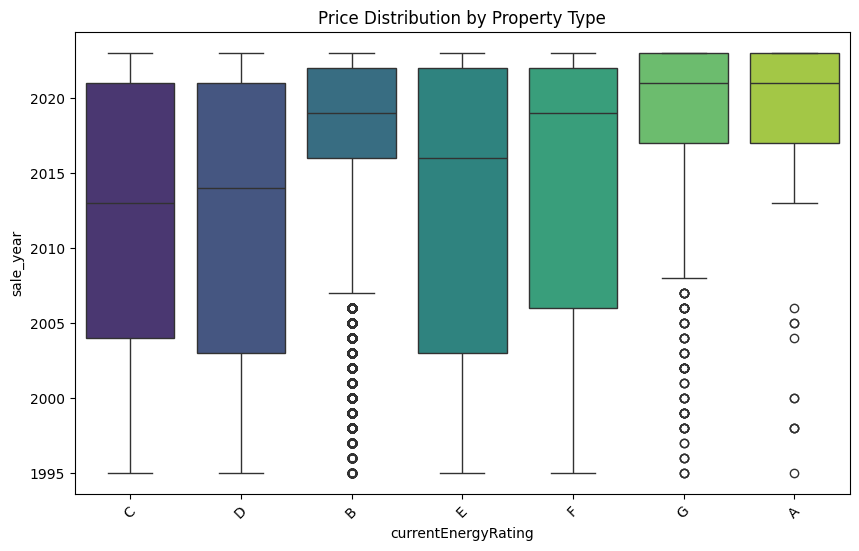

In [42]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='currentEnergyRating', y='sale_year', palette='viridis')
plt.title('Price Distribution by Property Type')
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()

- Check for time trends

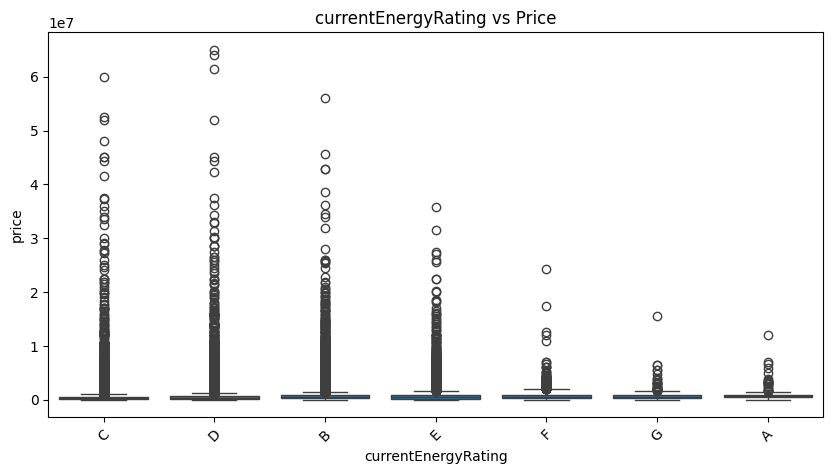

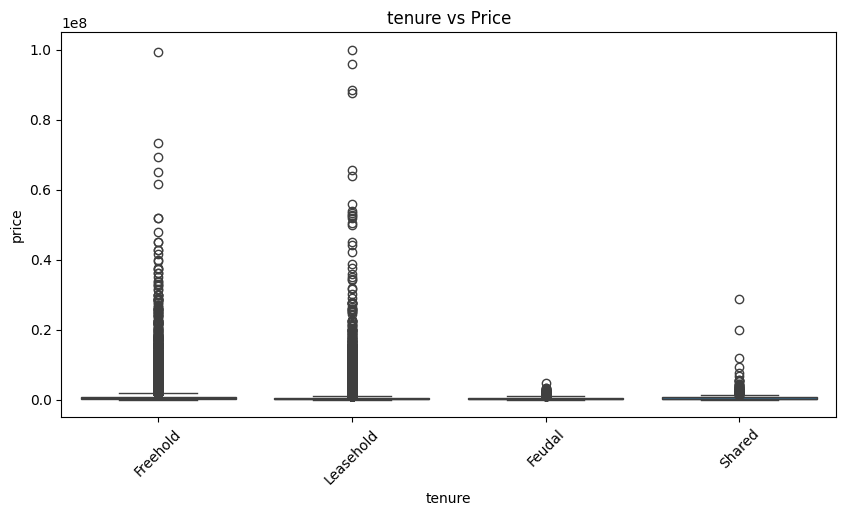

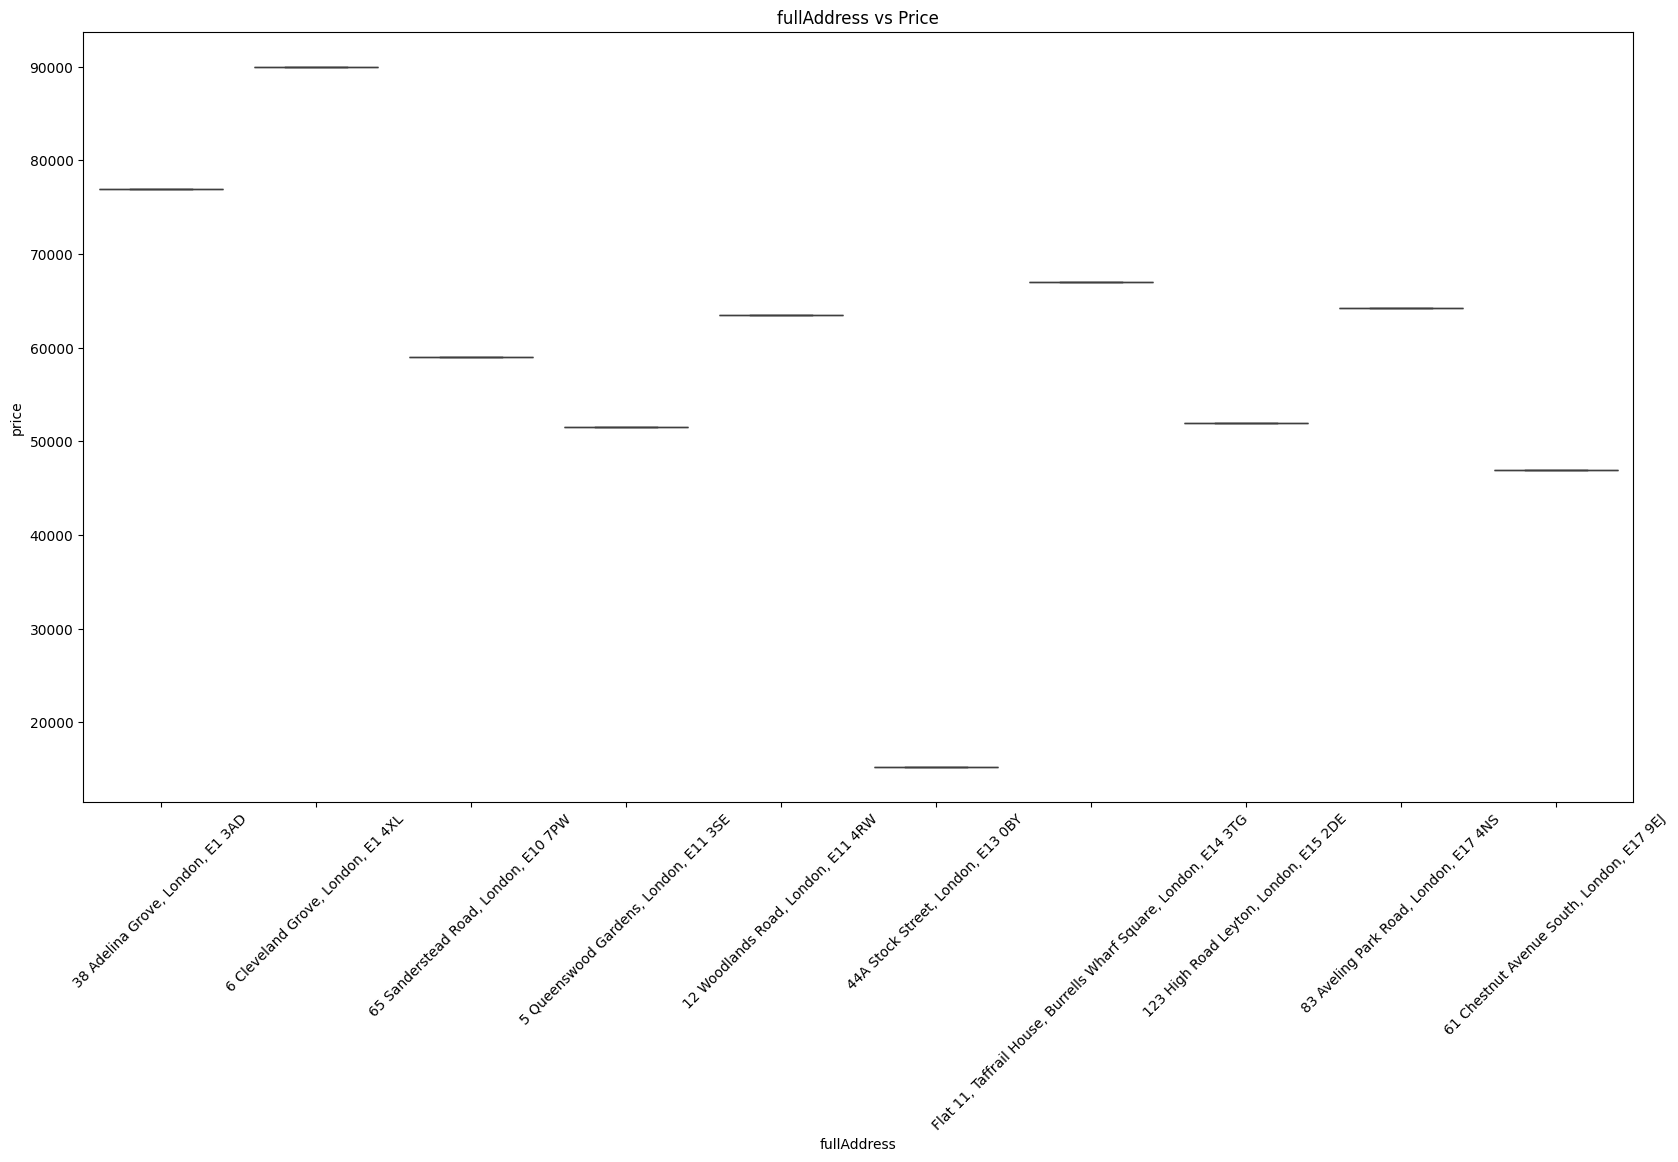

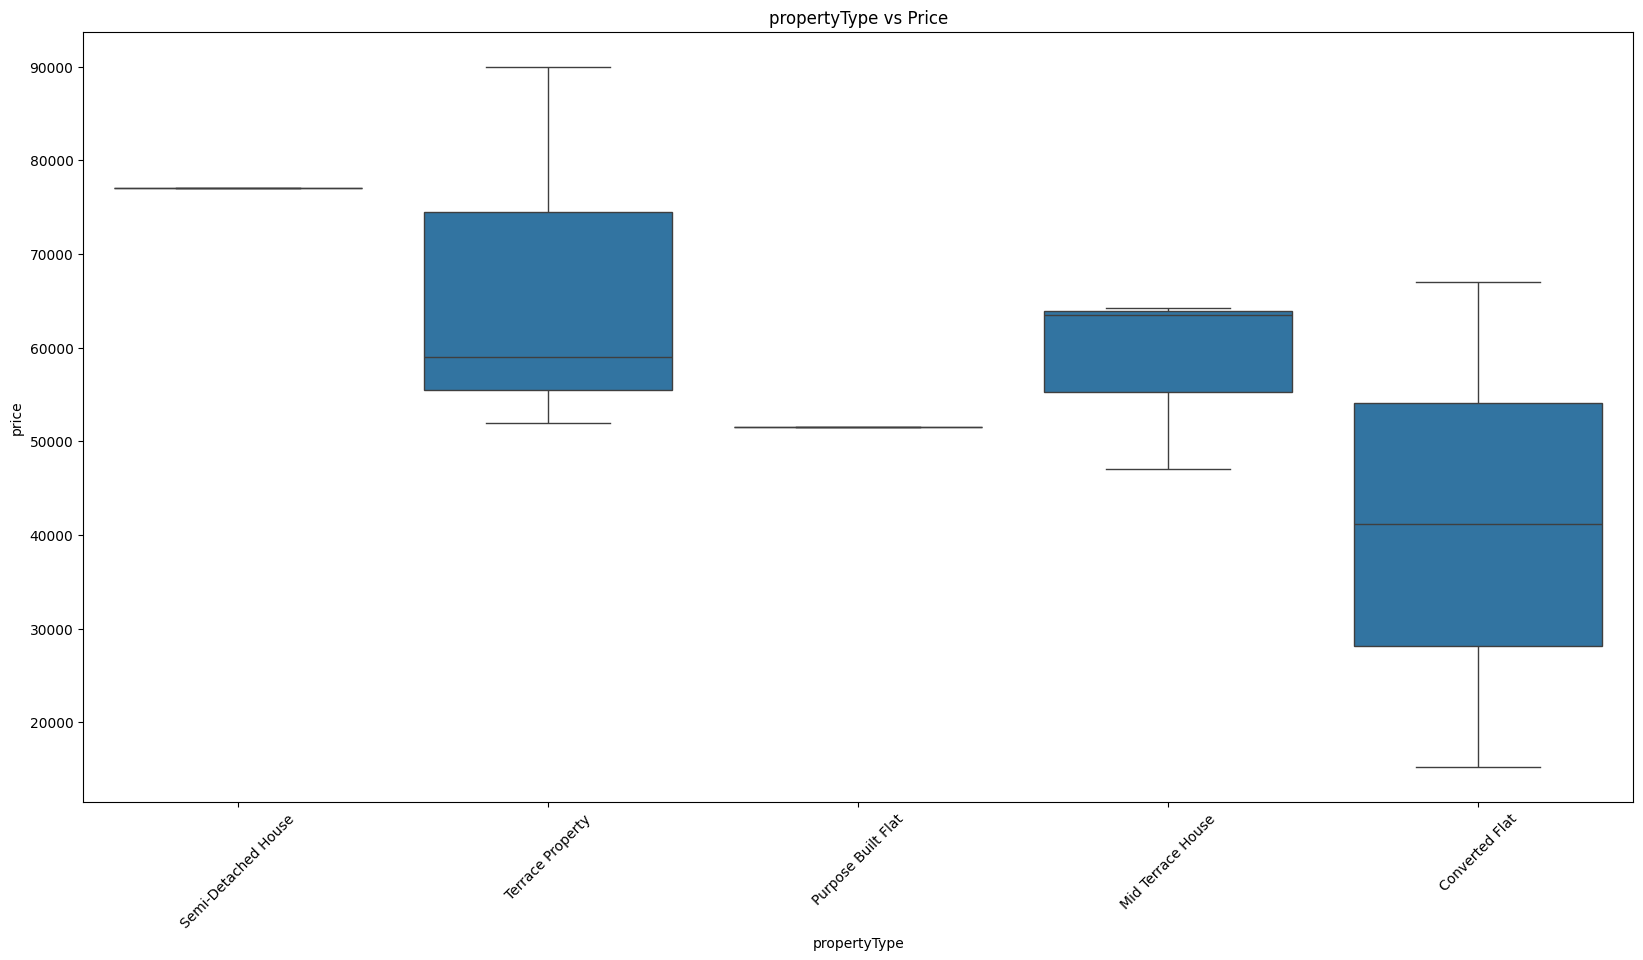

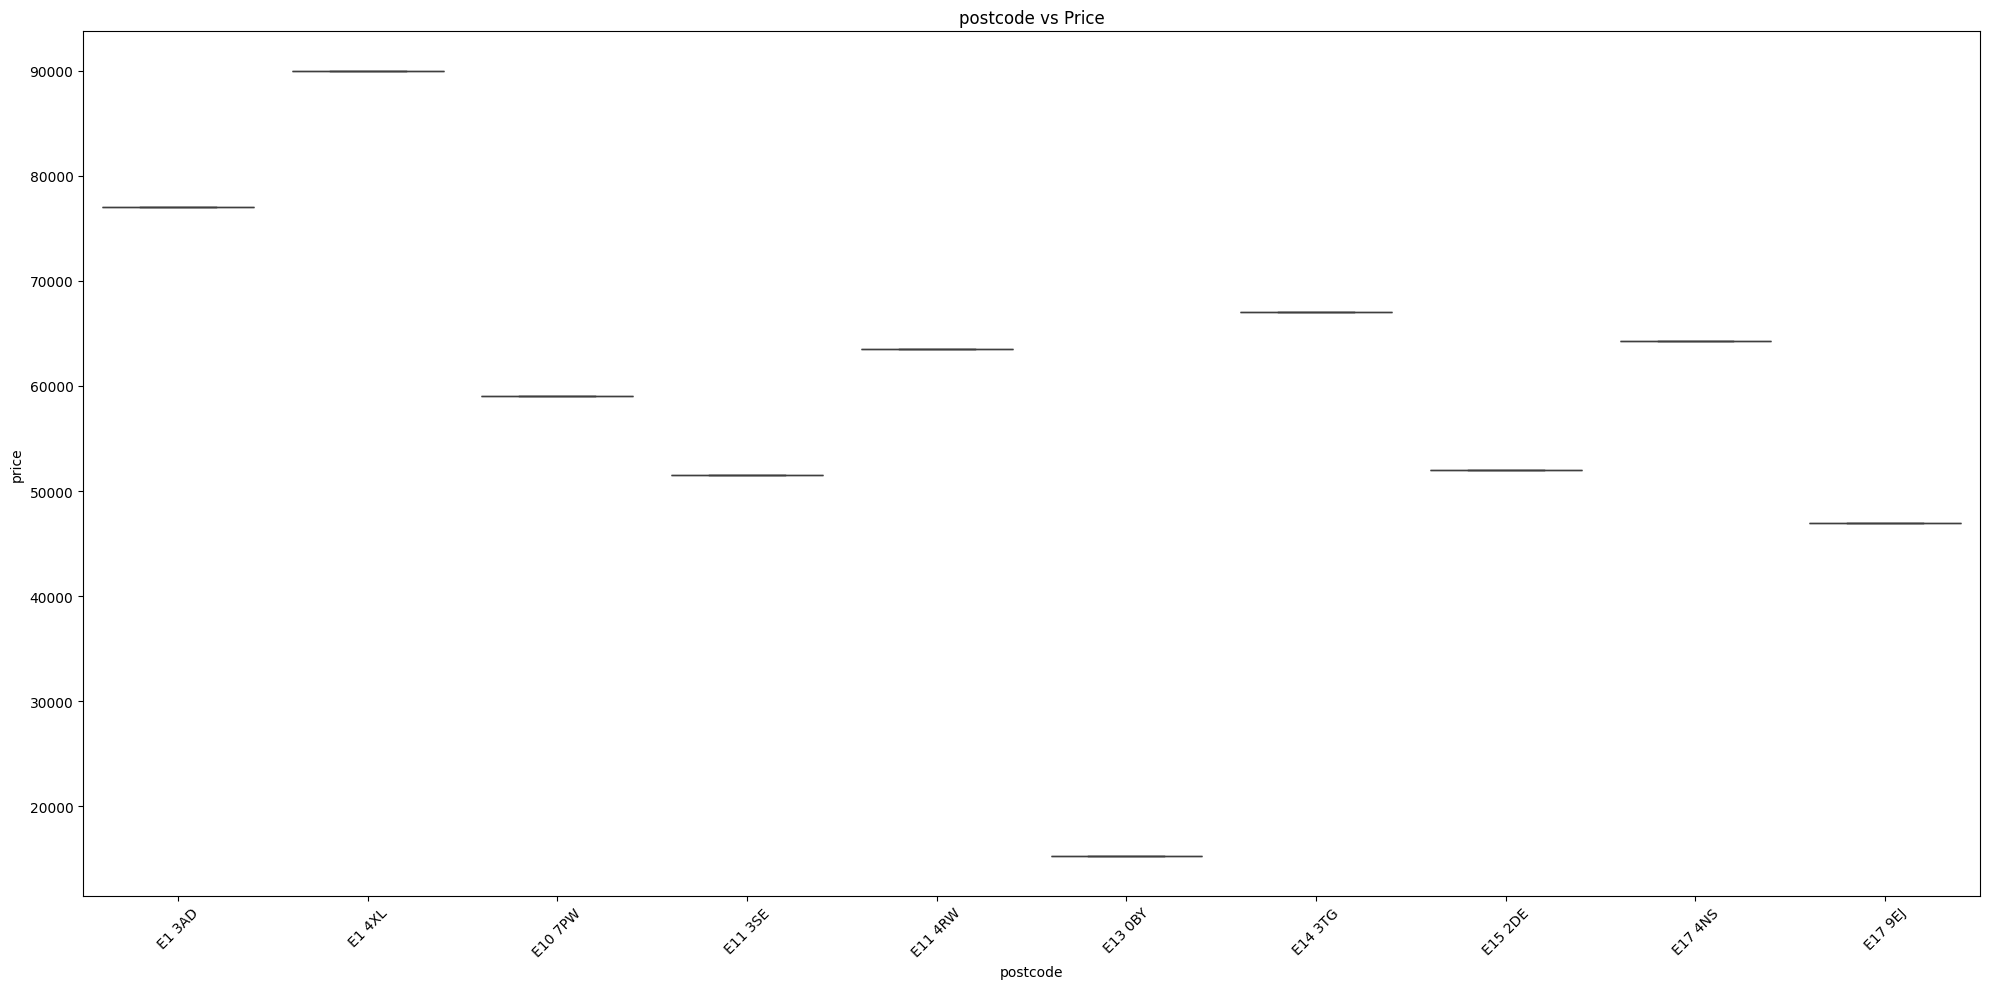

In [43]:

plt.figure(figsize=(10, 5))
sns.boxplot(x='currentEnergyRating', y='price', data=train)
plt.title("currentEnergyRating vs Price")
plt.xticks(rotation=45)

plt.figure(figsize=(10, 5))
sns.boxplot(x='tenure', y='price', data=train)
plt.title("tenure vs Price")
plt.xticks(rotation=45)

plt.figure(figsize=(20, 10))
sns.boxplot(x=train['fullAddress'].head(10), y='price', data=train)
plt.title("fullAddress vs Price")
plt.xticks(rotation=45)

plt.figure(figsize=(20, 10))
sns.boxplot(x=train['propertyType'].head(10), y='price', data=train)
plt.title("propertyType vs Price")
plt.xticks(rotation=45)

plt.figure(figsize=(20, 10))
sns.boxplot(x=train['postcode'].head(10), y='price', data=train)
plt.title("postcode vs Price")
plt.xticks(rotation=45)



# train['fullAddress'].value_counts().head(15).plot(kind='bar',figsize=(20,5),fontsize=15)


plt.tight_layout()
plt.show()

<Axes: ylabel='price'>

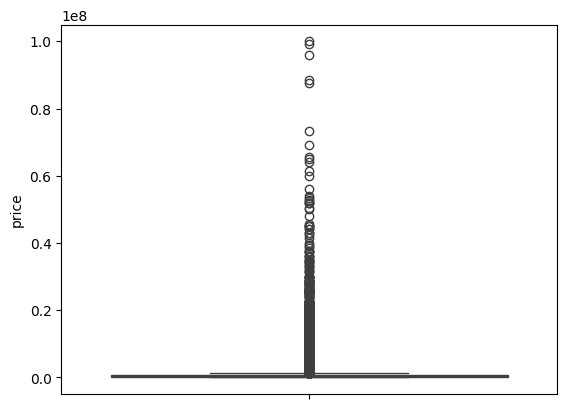

In [44]:
sns.boxplot(train['price'])

<Axes: ylabel='price'>

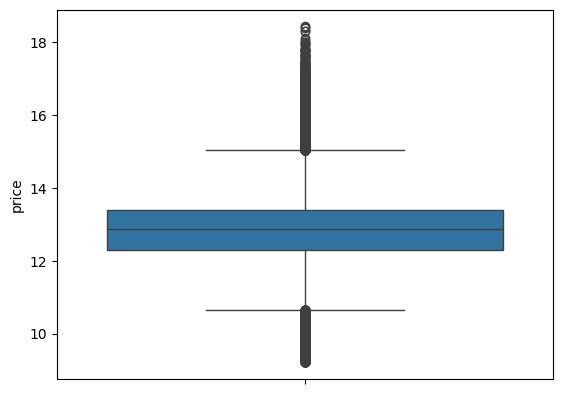

In [45]:
sns.boxplot(target)

In [46]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train['price']))
print(z)



[0.42318334 0.412984   0.43731094 ... 0.08933442 2.08681945 4.22558042]


#  Step 5: Data Preprocessing


- Convert date/time fields if available
- Encode categorical variables
- Scale numerical variables
- Feature engineering (e.g., extract month/year from date, create new ratios)

In [47]:
print(train.isnull().sum())

ID                         0
fullAddress                0
postcode                   0
country                    0
outcode                    0
latitude                   0
longitude                  0
bathrooms              48479
bedrooms               24843
floorAreaSqM           13806
livingRooms            37040
tenure                  5721
propertyType             508
currentEnergyRating    56814
sale_month                 0
sale_year                  0
price                      0
dtype: int64


In [48]:
train[ 'floorAreaSqM'] = np.log(train['floorAreaSqM'])

- Handle missing values

In [49]:
train['currentEnergyRating']

0           C
1           D
2           D
3         NaN
4           D
         ... 
266320      E
266321      C
266322      C
266323      B
266324    NaN
Name: currentEnergyRating, Length: 266325, dtype: object

In [50]:
train['propertyType'].isnull().sum()

np.int64(508)

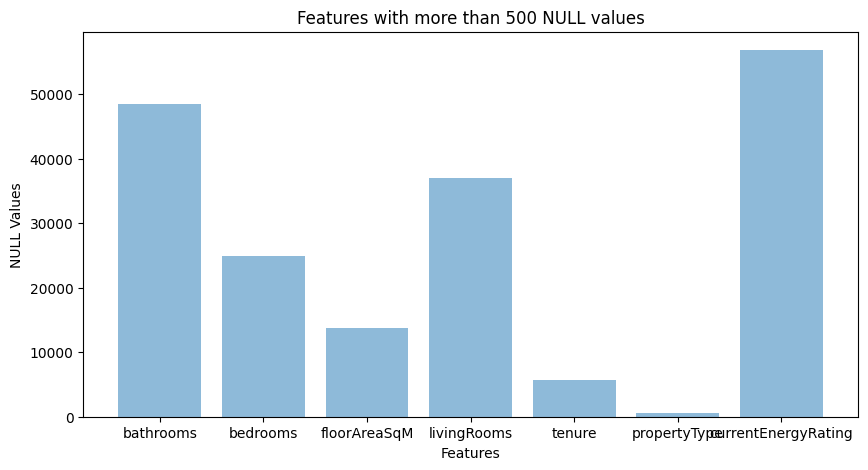

In [51]:
features = []
nullValues = []
for i in train:
    if (train.isna().sum()[i])>500 and i!='price':
        features.append(i)
        nullValues.append(train.isna().sum()[i])
y_pos = np.arange(len(features))
plt.figure(figsize=(10,5))
plt.bar(y_pos, nullValues, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('NULL Values')
plt.xlabel('Features')
plt.title('Features with more than 500 NULL values')
plt.show()

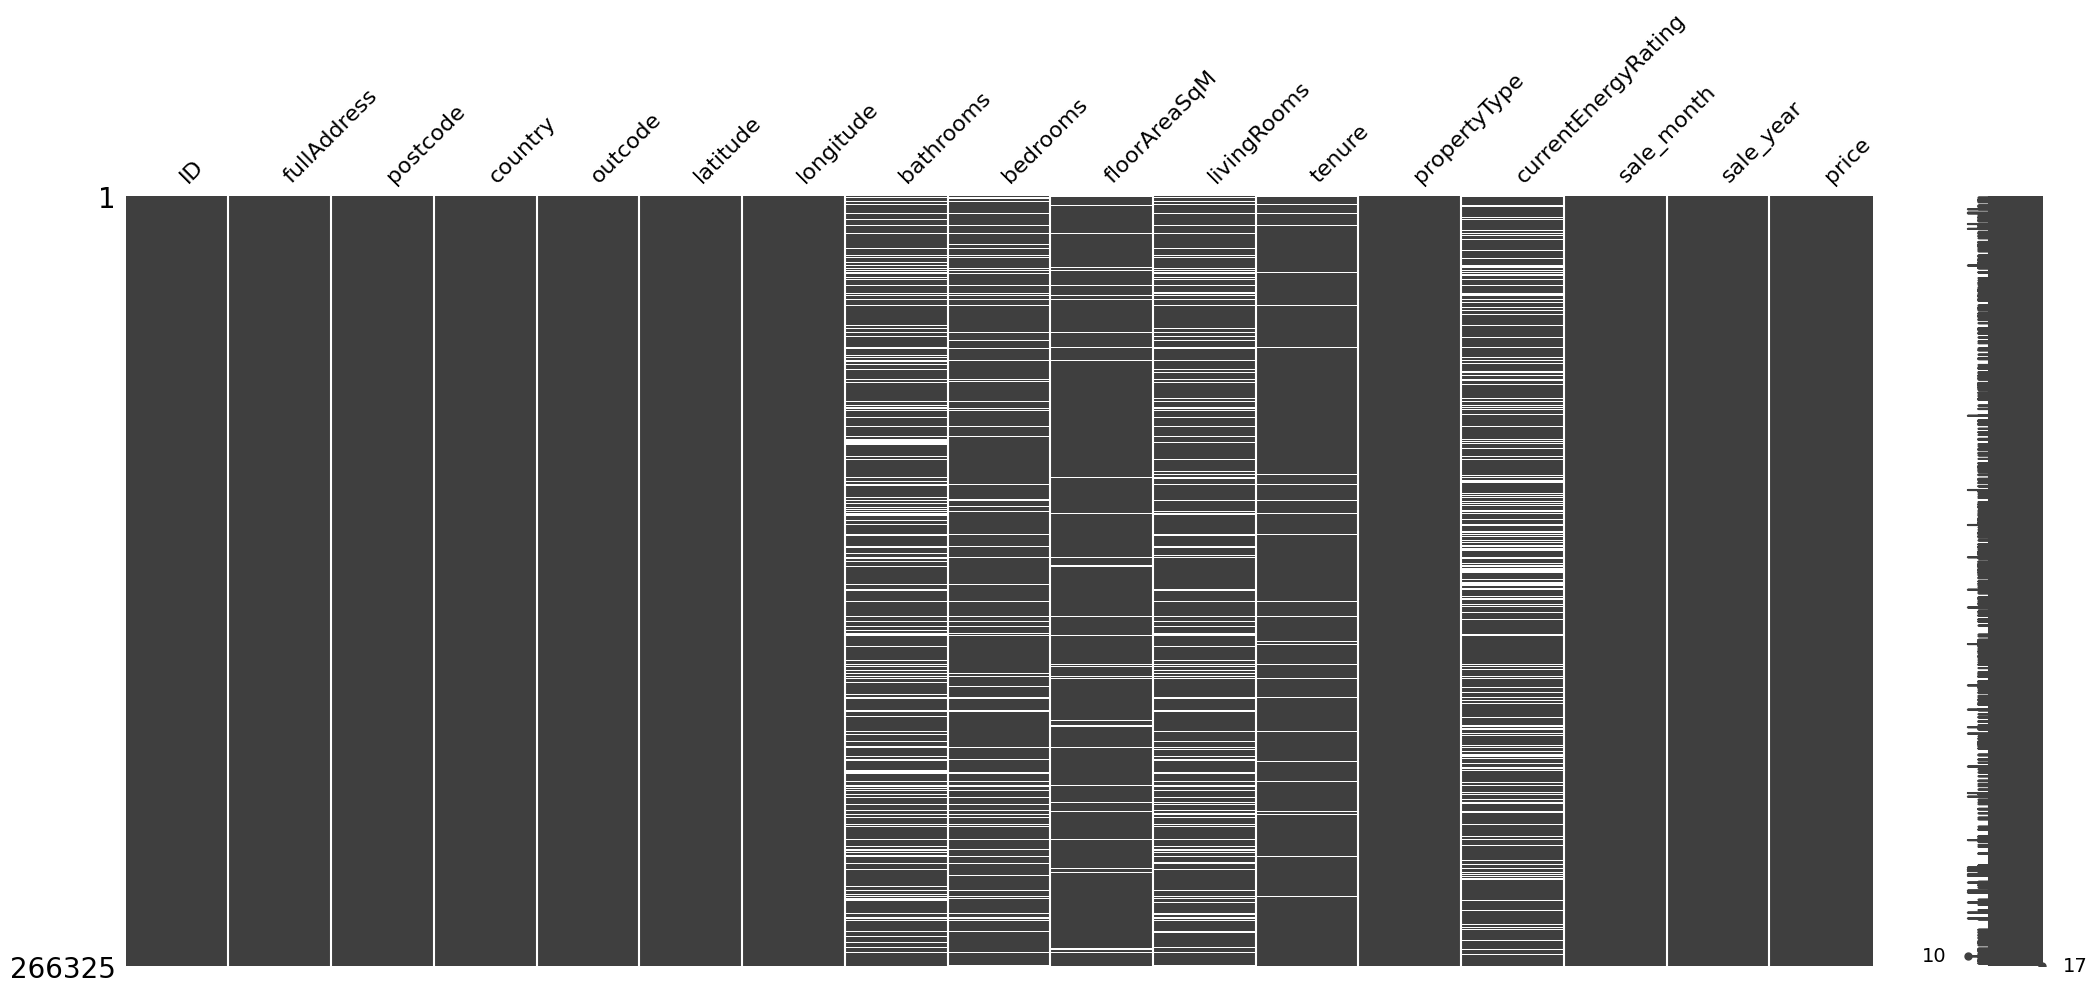

In [52]:
msno.matrix(train)
plt.show()

let us see the percetange of missing values for each feature

In [53]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)


missing_percent = (missing_values / len(train)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent.round(2)
})
missing_df

Missing Count  Missing %
currentEnergyRating          56814      21.33
bathrooms                    48479      18.20
livingRooms                  37040      13.91
bedrooms                     24843       9.33
floorAreaSqM                 13806       5.18
tenure                        5721       2.15
propertyType                   508       0.19

Imutation the categorical feature

- we will begin with propertyType feature

In [54]:
train['propertyType'].fillna(train['propertyType'].mode()[0], inplace=True)

/tmp/ipython-input-54-667203717.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['propertyType'].fillna(train['propertyType'].mode()[0], inplace=True)


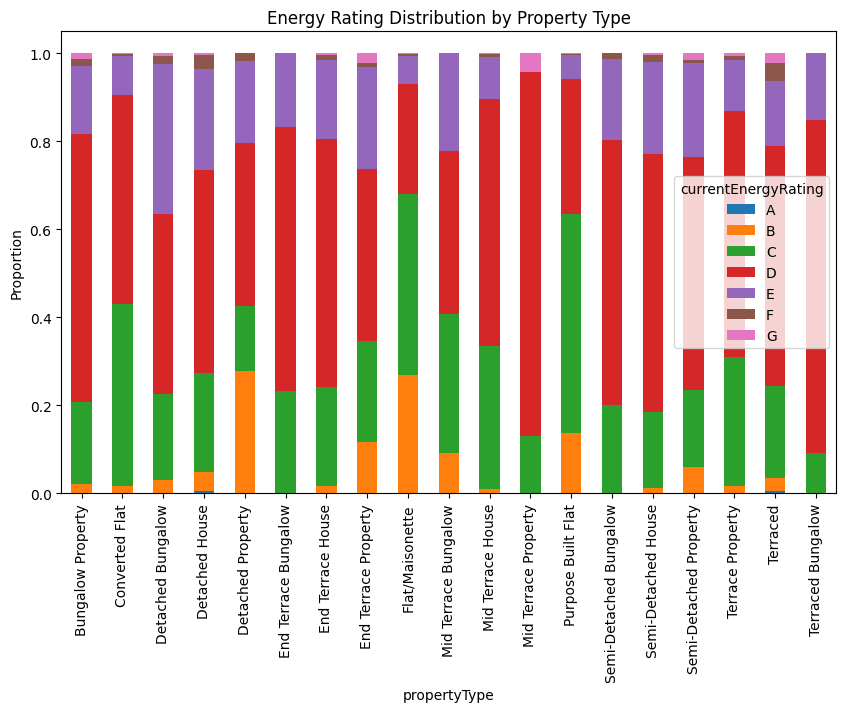

In [55]:
pd.crosstab(train['propertyType'], train['currentEnergyRating'], normalize='index').plot(
    kind='bar', stacked=True, figsize=(10, 6))
plt.title('Energy Rating Distribution by Property Type')
plt.ylabel('Proportion')
plt.show()

      we notice that currentEnergyRating is carrolated with propertyType in someway

In [56]:
train['currentEnergyRating'] = train.groupby('propertyType')['currentEnergyRating'].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)


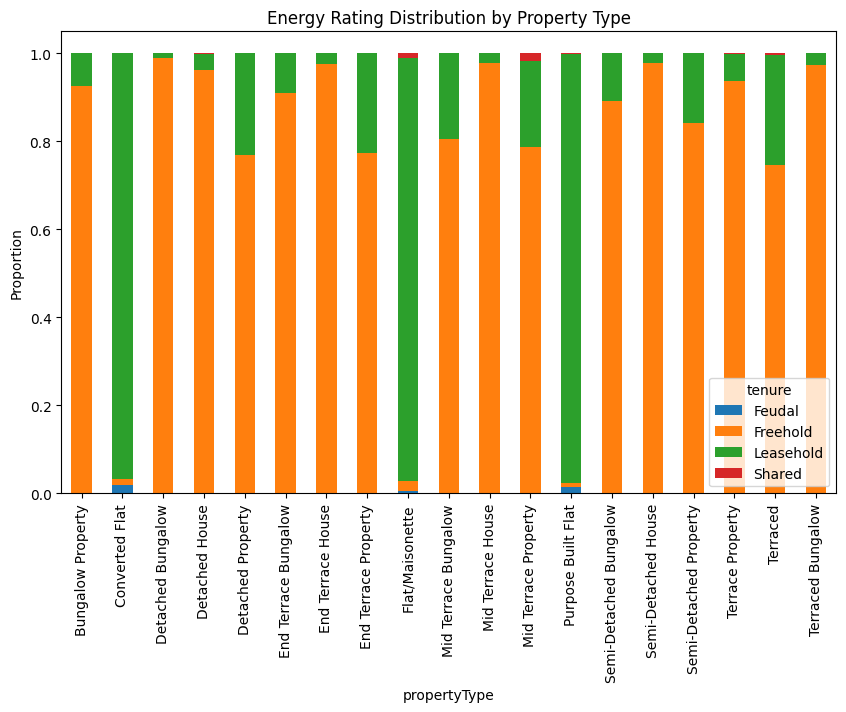

In [57]:
pd.crosstab(train['propertyType'], train['tenure'], normalize='index').plot(
    kind='bar', stacked=True, figsize=(10, 6))
plt.title('Energy Rating Distribution by Property Type')
plt.ylabel('Proportion')
plt.show()

In [58]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    r_corr = r - ((r-1)**2) / (n-1)
    k_corr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))


In [59]:

print(cramers_v(train['propertyType'], train['tenure']))


0.5532556672607303


     we also noticed a good correlation value between propertyType and tenure

In [60]:
train['tenure'] = train.groupby('propertyType')['tenure'].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)


In [61]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)


missing_percent = (missing_values / len(train)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent.round(2)
})
missing_df

Missing Count  Missing %
bathrooms             48479      18.20
livingRooms           37040      13.91
bedrooms              24843       9.33
floorAreaSqM          13806       5.18

- Now we will impute the numerical features

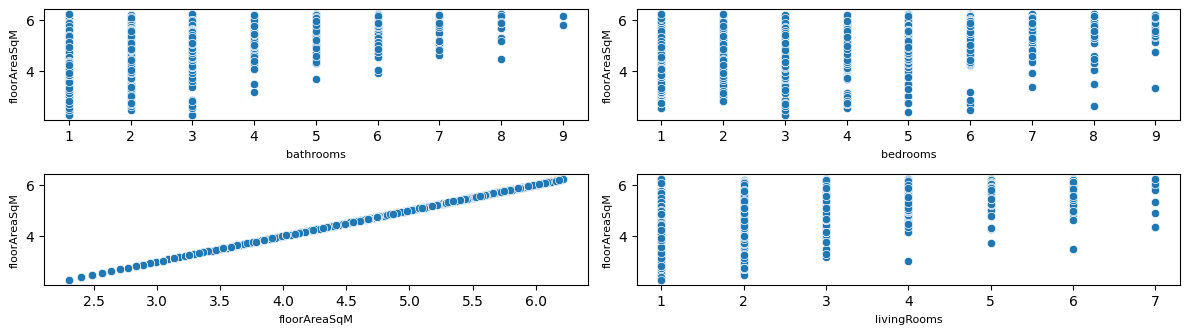

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = 2  # Number of columns in the grid
n_rows = (len(numerical_features_withoutPrice) // n_cols) + 1  # Calculate rows needed

plt.figure(figsize=(12, 8))
# Check linearity between numerical features and target (e.g., price)
num_features = ['bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms']
for i, feature in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=train, x=feature, y='floorAreaSqM')
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('floorAreaSqM', fontsize=8)


plt.tight_layout()  # Prevent overlapping labels
plt.show()




    It is obvious we have a linear relationship between those numerical features . As a result , we will use BayesianRidge as an estimator

In [63]:
  # or use DecisionTreeRegressor, etc.

# Select the features you want to impute
features_to_impute = ['bathrooms', 'floorAreaSqM', 'bedrooms', 'livingRooms']

# Extract subset for imputation
subset = train[features_to_impute]

# Initialize the imputer
imputer = IterativeImputer(estimator=BayesianRidge(), random_state=0)

# Fit and transform
imputed_data = imputer.fit_transform(subset)

# Replace in original dataframe
train[features_to_impute] = imputed_data


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [64]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)


missing_percent = (missing_values / len(train)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent.round(2)
})
missing_df

Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

In [65]:
train['bathrooms'] = train['bathrooms'].round()
train['bedrooms'] = train['bedrooms'].round()
train['livingRooms'] = train['livingRooms'].round()


In [66]:
train.head()

ID                            fullAddress postcode  country outcode  \
0   0       38 Adelina Grove, London, E1 3AD   E1 3AD  England      E1   
1   1      6 Cleveland Grove, London, E1 4XL   E1 4XL  England      E1   
2   2   65 Sanderstead Road, London, E10 7PW  E10 7PW  England     E10   
3   3  5 Queenswood Gardens, London, E11 3SE  E11 3SE  England     E11   
4   4     12 Woodlands Road, London, E11 4RW  E11 4RW  England     E11   

    latitude  longitude  bathrooms  bedrooms  floorAreaSqM  livingRooms  \
0  51.519406  -0.053261        1.0       3.0      4.382027          1.0   
1  51.521261  -0.053384        2.0       4.0      4.700480          1.0   
2  51.569054  -0.034892        1.0       3.0      4.430817          1.0   
3  51.564212   0.026292        1.0       2.0      4.276666          1.0   
4  51.563430   0.006260        1.0       3.0      4.644391          1.0   

      tenure         propertyType currentEnergyRating  sale_month  sale_year  \
0   Freehold  Semi-Detached House                   C           1       1995   
1  Leasehold     Terrace Property                   D           1       1995   
2   Freehold     Terrace Property                   D           1       1995   
3  Leasehold   Purpose Built Flat                   C           1       1995   
4   Freehold    Mid Terrace House                   D           1       1995   

   price  
0  77000  
1  89995  
2  59000  
3  51500  
4  63500

Dealing with outliers

- Detect and address outliers

<Axes: ylabel='price'>

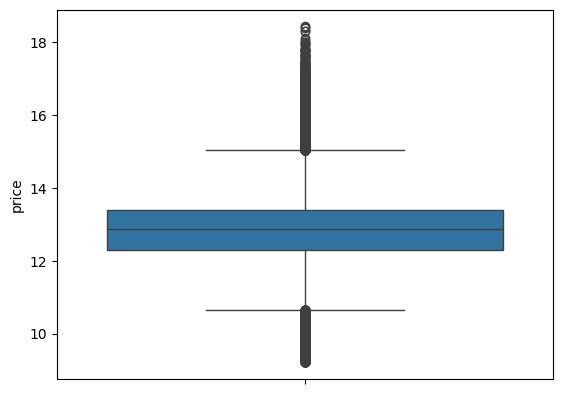

In [67]:
sns.boxplot(target)

In [68]:
low = np.percentile(target, 0.1)
high = np.percentile(target, 99.9)

# Clip values
train['log_price_clipped'] = target.clip(lower=low, upper=high)



<Axes: ylabel='log_price_clipped'>

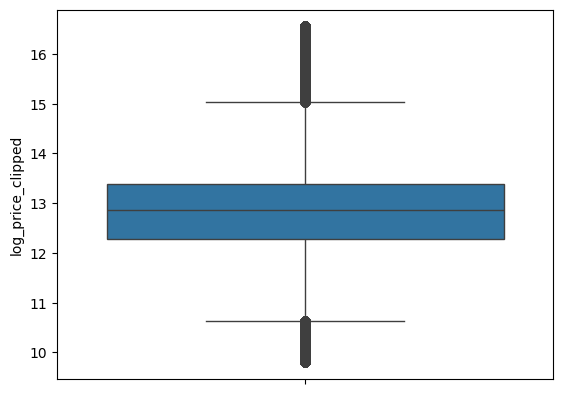

In [69]:
sns.boxplot(train['log_price_clipped'])

In [70]:
Q1 = train['bathrooms'].quantile(0.25)
Q3 = train['bathrooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['bathrooms'] < lower_bound) | (train['bathrooms'] > upper_bound)]
outliers['bathrooms'].max()

9.0

In [71]:
train.head(64)

ID                            fullAddress postcode  country outcode  \
0    0       38 Adelina Grove, London, E1 3AD   E1 3AD  England      E1   
1    1      6 Cleveland Grove, London, E1 4XL   E1 4XL  England      E1   
2    2   65 Sanderstead Road, London, E10 7PW  E10 7PW  England     E10   
3    3  5 Queenswood Gardens, London, E11 3SE  E11 3SE  England     E11   
4    4     12 Woodlands Road, London, E11 4RW  E11 4RW  England     E11   
..  ..                                    ...      ...      ...     ...   
59  59  102 Cheddington Road, London, N18 1LR  N18 1LR  England     N18   
60  60    53 Wedmore Gardens, London, N19 4SY  N19 4SY  England     N19   
61  61        76 Lincoln Road, London, N2 9DL   N2 9DL  England      N2   
62  62      13 Sylvester Road, London, N2 8HN   N2 8HN  England      N2   
63  63     64 Winnington Road, London, N2 0TX   N2 0TX  England      N2   

     latitude  longitude  bathrooms  bedrooms  floorAreaSqM  livingRooms  \
0   51.519406  -0.053261        1.0       3.0      4.382027          1.0   
1   51.521261  -0.053384        2.0       4.0      4.700480          1.0   
2   51.569054  -0.034892        1.0       3.0      4.430817          1.0   
3   51.564212   0.026292        1.0       2.0      4.276666          1.0   
4   51.563430   0.006260        1.0       3.0      4.644391          1.0   
..        ...        ...        ...       ...           ...          ...   
59  51.620249  -0.079402        1.0       2.0      4.247965          1.0   
60  51.562329  -0.130103        1.0       1.0      3.737670          1.0   
61  51.591157  -0.160510        3.0       4.0      5.313206          2.0   
62  51.598317  -0.173606        2.0       4.0      5.170484          1.0   
63  51.577491  -0.175040        8.0       8.0      7.417835          5.0   

       tenure         propertyType currentEnergyRating  sale_month  sale_year  \
0    Freehold  Semi-Detached House                   C           1       1995   
1   Leasehold     Terrace Property                   D           1       1995   
2    Freehold     Terrace Property                   D           1       1995   
3   Leasehold   Purpose Built Flat                   C           1       1995   
4    Freehold    Mid Terrace House                   D           1       1995   
..        ...                  ...                 ...         ...        ...   
59   Freehold     Terrace Property                   D           1       1995   
60  Leasehold   Purpose Built Flat                   E           1       1995   
61   Freehold    End Terrace House                   F           1       1995   
62   Freehold    Mid Terrace House                   C           1       1995   
63   Freehold       Detached House                   C           1       1995   

      price  log_price_clipped  
0     77000          11.251574  
1     89995          11.407521  
2     59000          10.985310  
3     51500          10.849357  
4     63500          11.058811  
..      ...                ...  
59    57500          10.959558  
60    46500          10.747229  
61    70000          11.156265  
62   106550          11.576379  
63  1175000          13.976780  

[64 rows x 18 columns]

<Axes: ylabel='bathrooms'>

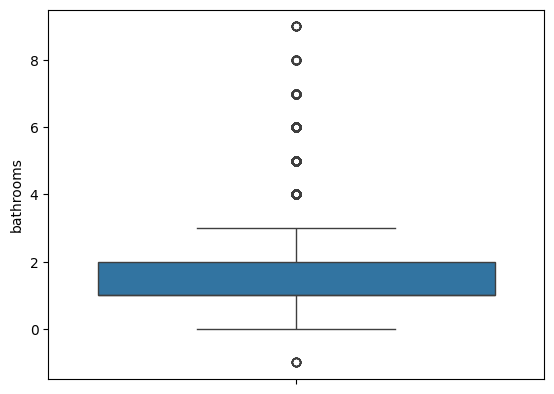

In [72]:
sns.boxplot(train['bathrooms'])

In [73]:
Q1 = train['floorAreaSqM'].quantile(0.25)
Q3 = train['floorAreaSqM'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['floorAreaSqM'] < lower_bound) | (train['floorAreaSqM'] > upper_bound)]


<Axes: ylabel='floorAreaSqM'>

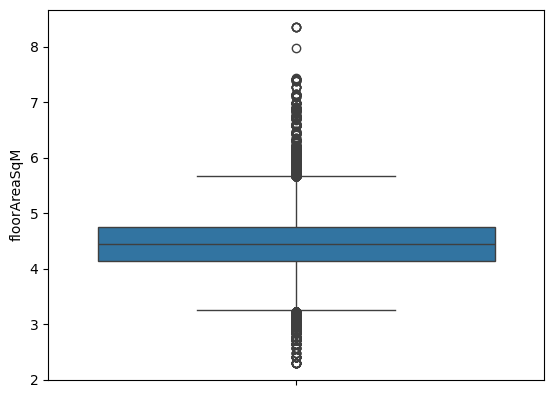

In [74]:

sns.boxplot(train['floorAreaSqM'])


<Axes: ylabel='floorAreaSqM'>

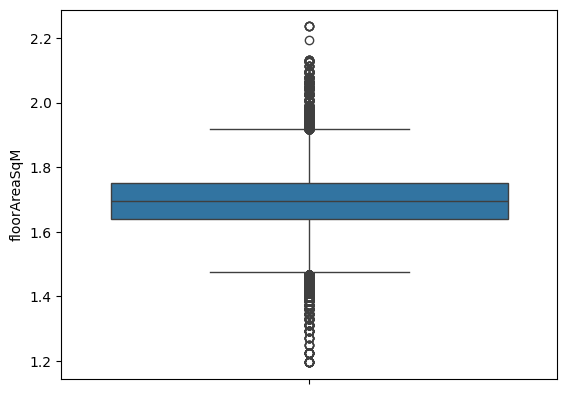

In [75]:
logfloor=np.log1p(train['floorAreaSqM'])
sns.boxplot(logfloor)

In [76]:
Q1 = train['bedrooms'].quantile(0.25)
Q3 = train['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['bedrooms'] < lower_bound) | (train['bedrooms'] > upper_bound)]
outliers.head()

ID                            fullAddress postcode  country outcode  \
32  32    40 Cranley Gardens, London, N10 3AP  N10 3AP  England     N10   
36  36    15 Woodside Avenue, London, N12 8AN  N12 8AN  England     N12   
56  56         707 High Road, London, N17 8AD  N17 8AD  England     N17   
63  63     64 Winnington Road, London, N2 0TX   N2 0TX  England      N2   
67  67  124 Old Park Ridings, London, N21 2EP  N21 2EP  England     N21   

     latitude  longitude  bathrooms  bedrooms  floorAreaSqM  livingRooms  \
32  51.586570  -0.141234        2.0       5.0      5.379897          2.0   
36  51.618980  -0.181429        3.0       5.0      5.451038          2.0   
56  51.602202  -0.068525        3.0       5.0      5.655992          2.0   
63  51.577491  -0.175040        8.0       8.0      7.417835          5.0   
67  51.646400  -0.091015        1.0       5.0      5.726848          2.0   

      tenure         propertyType currentEnergyRating  sale_month  sale_year  \
32  Freehold  Semi-Detached House                   D           1       1995   
36  Freehold    End Terrace House                   C           1       1995   
56  Freehold       Detached House                   D           1       1995   
63  Freehold       Detached House                   C           1       1995   
67  Freehold       Detached House                   B           1       1995   

      price  log_price_clipped  
32   294000          12.591338  
36   165000          12.013707  
56   100000          11.512935  
63  1175000          13.976780  
67   315000          12.660331

In [77]:
# to get the correlation between num and cat
def categorical_numeric_corr(df, cat_col, num_col):
    mean_encoded = df.groupby(cat_col)[num_col].mean()
    return df[cat_col].map(mean_encoded).corr(df[num_col])


In [78]:
categorical_numeric_corr(train, 'propertyType', 'price')



np.float64(0.19122748484263422)

Removing unhelpfull features

In [79]:
train.drop(['ID', 'country','price','fullAddress'], axis=1, inplace=True)


# we could drop latitude and longitude because we noticed that there is small correlation between them and the price ( we should make sure about that)

In [80]:
train.head()

postcode outcode   latitude  longitude  bathrooms  bedrooms  floorAreaSqM  \
0   E1 3AD      E1  51.519406  -0.053261        1.0       3.0      4.382027   
1   E1 4XL      E1  51.521261  -0.053384        2.0       4.0      4.700480   
2  E10 7PW     E10  51.569054  -0.034892        1.0       3.0      4.430817   
3  E11 3SE     E11  51.564212   0.026292        1.0       2.0      4.276666   
4  E11 4RW     E11  51.563430   0.006260        1.0       3.0      4.644391   

   livingRooms     tenure         propertyType currentEnergyRating  \
0          1.0   Freehold  Semi-Detached House                   C   
1          1.0  Leasehold     Terrace Property                   D   
2          1.0   Freehold     Terrace Property                   D   
3          1.0  Leasehold   Purpose Built Flat                   C   
4          1.0   Freehold    Mid Terrace House                   D   

   sale_month  sale_year  log_price_clipped  
0           1       1995          11.251574  
1           1       1995          11.407521  
2           1       1995          10.985310  
3           1       1995          10.849357  
4           1       1995          11.058811

 Categorical Feature Encoding

In [81]:
from sklearn.preprocessing import OrdinalEncoder


energy_order = ['G', 'F', 'E', 'D', 'C', 'B', 'A']
encoder = OrdinalEncoder(categories=[energy_order], handle_unknown='use_encoded_value', unknown_value=-1)
train['currentEnergyRating_encoded'] = encoder.fit_transform(train[['currentEnergyRating']])

train.drop(columns='currentEnergyRating',axis=1, inplace=True)

In [82]:
train.head()

postcode outcode   latitude  longitude  bathrooms  bedrooms  floorAreaSqM  \
0   E1 3AD      E1  51.519406  -0.053261        1.0       3.0      4.382027   
1   E1 4XL      E1  51.521261  -0.053384        2.0       4.0      4.700480   
2  E10 7PW     E10  51.569054  -0.034892        1.0       3.0      4.430817   
3  E11 3SE     E11  51.564212   0.026292        1.0       2.0      4.276666   
4  E11 4RW     E11  51.563430   0.006260        1.0       3.0      4.644391   

   livingRooms     tenure         propertyType  sale_month  sale_year  \
0          1.0   Freehold  Semi-Detached House           1       1995   
1          1.0  Leasehold     Terrace Property           1       1995   
2          1.0   Freehold     Terrace Property           1       1995   
3          1.0  Leasehold   Purpose Built Flat           1       1995   
4          1.0   Freehold    Mid Terrace House           1       1995   

   log_price_clipped  currentEnergyRating_encoded  
0          11.251574                          4.0  
1          11.407521                          3.0  
2          10.985310                          3.0  
3          10.849357                          4.0  
4          11.058811                          3.0

In [83]:
train['postcode'].unique()


array(['E1 3AD', 'E1 4XL', 'E10 7PW', ..., 'W8 5PP', 'W8 7LN', 'WC1X 0BY'],
      dtype=object)

     the postcode feature has an obvious cardinality (there was 45064 unique values which is considered a big number)

In [84]:
# train_encoded.head(266174)

In [85]:
freq_encoding = train['postcode'].value_counts() / len(train)
train['postcode_freq'] = train['postcode'].map(freq_encoding)

train.drop(columns='postcode',axis=1, inplace=True)

In [86]:
train.head()

outcode   latitude  longitude  bathrooms  bedrooms  floorAreaSqM  \
0      E1  51.519406  -0.053261        1.0       3.0      4.382027   
1      E1  51.521261  -0.053384        2.0       4.0      4.700480   
2     E10  51.569054  -0.034892        1.0       3.0      4.430817   
3     E11  51.564212   0.026292        1.0       2.0      4.276666   
4     E11  51.563430   0.006260        1.0       3.0      4.644391   

   livingRooms     tenure         propertyType  sale_month  sale_year  \
0          1.0   Freehold  Semi-Detached House           1       1995   
1          1.0  Leasehold     Terrace Property           1       1995   
2          1.0   Freehold     Terrace Property           1       1995   
3          1.0  Leasehold   Purpose Built Flat           1       1995   
4          1.0   Freehold    Mid Terrace House           1       1995   

   log_price_clipped  currentEnergyRating_encoded  postcode_freq  
0          11.251574                          4.0       0.000008  
1          11.407521                          3.0       0.000008  
2          10.985310                          3.0       0.000023  
3          10.849357                          4.0       0.000060  
4          11.058811                          3.0       0.000015

In [87]:
train['outcode'].value_counts()



outcode
SE18    4444
SW2     4440
N16     4163
SW4     4102
SW16    4006
        ... 
EC3V      17
EC2R       7
EC2V       7
W1C        3
EC3M       2
Name: count, Length: 167, dtype: int64

      it has high cardinality, but significantly less than postcode

In [88]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False)
encoded_outcode = encoder.fit_transform(train[['outcode']])
encoded_df =pd.DataFrame(encoded_outcode, columns=encoder.get_feature_names_out(['outcode']))

encoded_df

outcode_E10  outcode_E11  outcode_E12  outcode_E13  outcode_E14  \
0               0.0          0.0          0.0          0.0          0.0   
1               0.0          0.0          0.0          0.0          0.0   
2               1.0          0.0          0.0          0.0          0.0   
3               0.0          1.0          0.0          0.0          0.0   
4               0.0          1.0          0.0          0.0          0.0   
...             ...          ...          ...          ...          ...   
266320          0.0          0.0          0.0          0.0          0.0   
266321          0.0          0.0          0.0          0.0          0.0   
266322          0.0          0.0          0.0          0.0          0.0   
266323          0.0          0.0          0.0          0.0          0.0   
266324          0.0          0.0          0.0          0.0          0.0   

        outcode_E15  outcode_E16  outcode_E17  outcode_E18  outcode_E1W  ...  \
0               0.0          0.0          0.0          0.0          0.0  ...   
1               0.0          0.0          0.0          0.0          0.0  ...   
2               0.0          0.0          0.0          0.0          0.0  ...   
3               0.0          0.0          0.0          0.0          0.0  ...   
4               0.0          0.0          0.0          0.0          0.0  ...   
...             ...          ...          ...          ...          ...  ...   
266320          0.0          0.0          0.0          0.0          0.0  ...   
266321          0.0          0.0          0.0          0.0          0.0  ...   
266322          0.0          0.0          0.0          0.0          0.0  ...   
266323          0.0          0.0          0.0          0.0          0.0  ...   
266324          0.0          0.0          0.0          0.0          0.0  ...   

        outcode_WC1N  outcode_WC1R  outcode_WC1V  outcode_WC1X  outcode_WC2A  \
0                0.0           0.0           0.0           0.0           0.0   
1                0.0           0.0           0.0           0.0           0.0   
2                0.0           0.0           0.0           0.0           0.0   
3                0.0           0.0           0.0           0.0           0.0   
4                0.0           0.0           0.0           0.0           0.0   
...              ...           ...           ...           ...           ...   
266320           0.0           0.0           0.0           1.0           0.0   
266321           0.0           0.0           0.0           1.0           0.0   
266322           0.0           0.0           0.0           0.0           0.0   
266323           0.0           0.0           0.0           0.0           0.0   
266324           0.0           0.0           0.0           0.0           0.0   

        outcode_WC2B  outcode_WC2E  outcode_WC2H  outcode_WC2N  outcode_WC2R  
0                0.0           0.0           0.0           0.0           0.0  
1                0.0           0.0           0.0           0.0           0.0  
2                0.0           0.0           0.0           0.0           0.0  
3                0.0           0.0           0.0           0.0           0.0  
4                0.0           0.0           0.0           0.0           0.0  
...              ...           ...           ...           ...           ...  
266320           0.0           0.0           0.0           0.0           0.0  
266321           0.0           0.0           0.0           0.0           0.0  
266322           1.0           0.0           0.0           0.0           0.0  
266323           0.0           1.0           0.0           0.0           0.0  
266324           0.0           0.0           0.0           1.0           0.0  

[266325 rows x 166 columns]

    we used drop='first' in order  to avoid multicollinearity while using linear models

In [89]:
train = pd.concat([train.drop('outcode', axis=1), encoded_df], axis=1)


In [90]:
train.head()

latitude  longitude  bathrooms  bedrooms  floorAreaSqM  livingRooms  \
0  51.519406  -0.053261        1.0       3.0      4.382027          1.0   
1  51.521261  -0.053384        2.0       4.0      4.700480          1.0   
2  51.569054  -0.034892        1.0       3.0      4.430817          1.0   
3  51.564212   0.026292        1.0       2.0      4.276666          1.0   
4  51.563430   0.006260        1.0       3.0      4.644391          1.0   

      tenure         propertyType  sale_month  sale_year  ...  outcode_WC1N  \
0   Freehold  Semi-Detached House           1       1995  ...           0.0   
1  Leasehold     Terrace Property           1       1995  ...           0.0   
2   Freehold     Terrace Property           1       1995  ...           0.0   
3  Leasehold   Purpose Built Flat           1       1995  ...           0.0   
4   Freehold    Mid Terrace House           1       1995  ...           0.0   

   outcode_WC1R  outcode_WC1V  outcode_WC1X  outcode_WC2A  outcode_WC2B  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   outcode_WC2E  outcode_WC2H  outcode_WC2N  outcode_WC2R  
0           0.0           0.0           0.0           0.0  
1           0.0           0.0           0.0           0.0  
2           0.0           0.0           0.0           0.0  
3           0.0           0.0           0.0           0.0  
4           0.0           0.0           0.0           0.0  

[5 rows x 179 columns]

In [91]:
encoder = OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False)
encoded_tenure = encoder.fit_transform(train[['tenure']])
encoded_df =pd.DataFrame(encoded_tenure, columns=encoder.get_feature_names_out(['tenure']))

encoded_df

tenure_Freehold  tenure_Leasehold  tenure_Shared
0                   1.0               0.0            0.0
1                   0.0               1.0            0.0
2                   1.0               0.0            0.0
3                   0.0               1.0            0.0
4                   1.0               0.0            0.0
...                 ...               ...            ...
266320              0.0               1.0            0.0
266321              0.0               1.0            0.0
266322              0.0               1.0            0.0
266323              0.0               1.0            0.0
266324              0.0               1.0            0.0

[266325 rows x 3 columns]

In [92]:
train = pd.concat([train.drop('tenure', axis=1), encoded_df], axis=1)


In [93]:
train['propertyType'].value_counts()

propertyType
Purpose Built Flat        69234
Flat/Maisonette           61139
Mid Terrace House         45649
Converted Flat            32552
Semi-Detached House       20475
Terrace Property          15114
End Terrace House         13063
Detached House             6666
Terraced                    927
Bungalow Property           267
Semi-Detached Property      254
Semi-Detached Bungalow      232
Detached Bungalow           186
Detached Property           160
End Terrace Property        149
Mid Terrace Property        120
Mid Terrace Bungalow         67
Terraced Bungalow            38
End Terrace Bungalow         33
Name: count, dtype: int64

In [94]:
encoder = OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False)
encoded_propertyType = encoder.fit_transform(train[['propertyType']])
encoded_df =pd.DataFrame(encoded_propertyType, columns=encoder.get_feature_names_out(['propertyType']))

encoded_df

propertyType_Converted Flat  propertyType_Detached Bungalow  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                             0.0   
3                               0.0                             0.0   
4                               0.0                             0.0   
...                             ...                             ...   
266320                          0.0                             0.0   
266321                          1.0                             0.0   
266322                          0.0                             0.0   
266323                          0.0                             0.0   
266324                          0.0                             0.0   

        propertyType_Detached House  propertyType_Detached Property  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                             0.0   
3                               0.0                             0.0   
4                               0.0                             0.0   
...                             ...                             ...   
266320                          0.0                             0.0   
266321                          0.0                             0.0   
266322                          0.0                             0.0   
266323                          0.0                             0.0   
266324                          0.0                             0.0   

        propertyType_End Terrace Bungalow  propertyType_End Terrace House  \
0                                     0.0                             0.0   
1                                     0.0                             0.0   
2                                     0.0                             0.0   
3                                     0.0                             0.0   
4                                     0.0                             0.0   
...                                   ...                             ...   
266320                                0.0                             0.0   
266321                                0.0                             0.0   
266322                                0.0                             0.0   
266323                                0.0                             0.0   
266324                                0.0                             0.0   

        propertyType_End Terrace Property  propertyType_Flat/Maisonette  \
0                                     0.0                           0.0   
1                                     0.0                           0.0   
2                                     0.0                           0.0   
3                                     0.0                           0.0   
4                                     0.0                           0.0   
...                                   ...                           ...   
266320                                0.0                           1.0   
266321                                0.0                           0.0   
266322                                0.0                           0.0   
266323                                0.0                           1.0   
266324                                0.0                           1.0   

        propertyType_Mid Terrace Bungalow  propertyType_Mid Terrace House  \
0                                     0.0                             0.0   
1                                     0.0                             0.0   
2                                     0.0                             0.0   
3                                     0.0                             0.0   
4                                     0.0                             1.0   
...           

In [95]:
train = pd.concat([train.drop('propertyType', axis=1), encoded_df], axis=1)

In [96]:
train

latitude  longitude  bathrooms  bedrooms  floorAreaSqM  livingRooms  \
0       51.519406  -0.053261        1.0       3.0      4.382027          1.0   
1       51.521261  -0.053384        2.0       4.0      4.700480          1.0   
2       51.569054  -0.034892        1.0       3.0      4.430817          1.0   
3       51.564212   0.026292        1.0       2.0      4.276666          1.0   
4       51.563430   0.006260        1.0       3.0      4.644391          1.0   
...           ...        ...        ...       ...           ...          ...   
266320  51.528933  -0.116113        2.0       2.0      4.418841          1.0   
266321  51.527292  -0.112005        1.0       2.0      4.234107          1.0   
266322  51.516084  -0.123581        1.0       2.0      3.912023          1.0   
266323  51.511861  -0.125419        2.0       2.0      4.867534          1.0   
266324  51.509261  -0.123213        1.0       2.0      4.475021          1.0   

        sale_month  sale_year  log_price_clipped  currentEnergyRating_encoded  \
0                1       1995          11.251574                          4.0   
1                1       1995          11.407521                          3.0   
2                1       1995          10.985310                          3.0   
3                1       1995          10.849357                          4.0   
4                1       1995          11.058811                          3.0   
...            ...        ...                ...                          ...   
266320          12       2023          13.592368                          2.0   
266321          12       2023          13.217675                          4.0   
266322          12       2023          13.500801                          4.0   
266323          12       2023          15.001829                          5.0   
266324          12       2023          15.607270                          4.0   

        ...  propertyType_Mid Terrace Bungalow  \
0       ...                                0.0   
1       ...                                0.0   
2       ...                                0.0   
3       ...                                0.0   
4       ...                                0.0   
...     ...                                ...   
266320  ...                                0.0   
266321  ...                                0.0   
266322  ...                                0.0   
266323  ...                                0.0   
266324  ...                                0.0   

        propertyType_Mid Terrace House  propertyType_Mid Terrace Property  \
0                                  0.0                                0.0   
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  1.0                                0.0   
...                                ...                                ...   
266320                             0.0                                0.0   
266321                             0.0                                0.0   
266322                             0.0                                0.0   
266323                             0.0                                0.0   
266324                             0.0                                0.0   

        propertyType_Purpose Built Flat  propertyType_Semi-Detached Bungalow  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   
3                                   1.0                                  0.0   
4                                   0.0                                  0.0   
...                                 ...                              

In [97]:
from sklearn.feature_selection import VarianceThreshold

# Select only numeric columns
numeric_cols = train.select_dtypes(include=['int64', 'float64'])

# Fit VarianceThreshold (e.g., threshold=0.01 means less than 1% variability)
selector = VarianceThreshold(threshold=0.01)
selector.fit(numeric_cols)

# Get names of low variance features
low_variance_cols = numeric_cols.columns[~selector.get_support()]
print("Low variance features:", list(low_variance_cols))

Low variance features: ['latitude', 'longitude', 'postcode_freq', 'outcode_E10', 'outcode_E12', 'outcode_E13', 'outcode_E14', 'outcode_E15', 'outcode_E16', 'outcode_E18', 'outcode_E1W', 'outcode_E2', 'outcode_E3', 'outcode_E4', 'outcode_E5', 'outcode_E6', 'outcode_E7', 'outcode_E8', 'outcode_E9', 'outcode_EC1A', 'outcode_EC1M', 'outcode_EC1N', 'outcode_EC1R', 'outcode_EC1V', 'outcode_EC1Y', 'outcode_EC2A', 'outcode_EC2M', 'outcode_EC2R', 'outcode_EC2V', 'outcode_EC2Y', 'outcode_EC3A', 'outcode_EC3M', 'outcode_EC3N', 'outcode_EC3R', 'outcode_EC3V', 'outcode_EC4A', 'outcode_EC4M', 'outcode_EC4R', 'outcode_EC4V', 'outcode_EC4Y', 'outcode_N10', 'outcode_N11', 'outcode_N12', 'outcode_N13', 'outcode_N14', 'outcode_N18', 'outcode_N19', 'outcode_N2', 'outcode_N20', 'outcode_N21', 'outcode_N3', 'outcode_N4', 'outcode_N5', 'outcode_N6', 'outcode_N7', 'outcode_N9', 'outcode_NW1', 'outcode_NW10', 'outcode_NW11', 'outcode_NW2', 'outcode_NW3', 'outcode_NW4', 'outcode_NW5', 'outcode_NW6', 'outcode_NW

#Pip line

In [28]:
train=pd.read_csv('/content/ML_homwwork/Data/train.csv')
test=pd.read_csv('/content/ML_homwwork/Data/test.csv')

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd



In [30]:
# Log transformer for skewed numerical features
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = np.log1p(X[col])
        return X

# Frequency encoding for high cardinality

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        X = pd.DataFrame(X, columns=[self.column])
        freqs = X[self.column].value_counts() / len(X)
        self.freq_map = freqs.to_dict()
        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=[self.column])
        X[self.column + '_freq'] = X[self.column].map(self.freq_map)
        return X[[self.column + '_freq']]
# Drop specified columns
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(columns=self.columns)


In [31]:
# Numerical columns
num_cols = ['bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms']
log_cols = ['floorAreaSqM']

# Categorical columns
ordinal_col = 'currentEnergyRating'
ordinal_order = ['G', 'F', 'E', 'D', 'C', 'B', 'A']

onehot_cols = ['propertyType', 'tenure', 'outcode']
freq_encode_col = 'postcode'

# Columns to drop initially (original columns that won't be in the final processed data)
drop_cols = ['ID', 'country', 'price', 'fullAddress', 'postcode', 'outcode', 'tenure', 'propertyType', 'currentEnergyRating']

In [32]:
# Ordinal encoder
ordinal_encoder = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[ordinal_order], handle_unknown='use_encoded_value', unknown_value=-1))
])

# OneHot encoding for nominal categorical features
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Numerical imputation
num_imputer = Pipeline([
    ('imputer', IterativeImputer(estimator=BayesianRidge(), random_state=0))
])

# Categorical imputation
cat_imputer = SimpleImputer(strategy='most_frequent')


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# الأعمدة الخاصة بك
categorical_features = ['propertyType', 'tenure', 'outcode']
ordinal_feature = 'currentEnergyRating'
freq_feature = 'postcode'
numerical_features = ['bathrooms', 'floorAreaSqM', 'bedrooms', 'livingRooms']

# ترتيب تقييم الطاقة
energy_order = ['G', 'F', 'E', 'D', 'C', 'B', 'A']

# ===== Transformers =====
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

ordinal_transformer = OrdinalEncoder(categories=[energy_order], handle_unknown='use_encoded_value', unknown_value=-1)

freq_encoder = Pipeline(steps=[
    ('freq_enc', FrequencyEncoder(column=freq_feature))
])

numerical_imputer = Pipeline(steps=[
    ('imputer', IterativeImputer(estimator=BayesianRidge(), random_state=0)),
])

# تحويل القيم لأخذ اللوغاريتم
log_transformer = FunctionTransformer(np.log1p, feature_names_out='one-to-one')

# حذف الأعمدة قليلة التباين
variance_filter = VarianceThreshold(threshold=0.01)

# ===== ColumnTransformer =====
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('ordinal', ordinal_transformer, [ordinal_feature]),
    ('freq', freq_encoder, [freq_feature]),
    ('num', numerical_imputer, numerical_features)
], remainder='drop')  # سيتم حذف الأعمدة غير المذكورة

# ===== Full Pipeline =====
from sklearn.pipeline import make_pipeline

preprocessing_pipeline = make_pipeline(
    preprocessor,
    variance_filter
)


In [34]:

target = np.log1p(train['price'])
train_processed = preprocessing_pipeline.fit_transform(train)

# تطبيق نفس pipeline على بيانات الاختبار
test_processed = preprocessing_pipeline.transform(test)



/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


# 📌 Step 6: Feature Selection (Optional)
- Use correlation, feature importance, or dimensionality reduction if needed

# 📌 Step 7: Model Building
- Split training data into train and validation sets
- Try different regression models:
  - Linear Regression
  - Random Forest
  - Gradient Boosting (e.g., XGBoost, LightGBM)
- Use cross-validation

In [98]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test, metric_name="rmse"):

    eval_set = [(X_train, y_train), (X_test, y_test)]

    model.fit(
        X_train, y_train,
        eval_set=eval_set,
        verbose=False
    )

    results = model.evals_result()

    train_metric = results['validation_0'][metric_name]
    test_metric = results['validation_1'][metric_name]

    plt.figure(figsize=(10, 6))
    plt.plot(train_metric, label='Train')
    plt.plot(test_metric, label='Test')
    plt.xlabel("Number of Trees (Iterations)")
    plt.ylabel(metric_name.upper())
    plt.title(f"Learning Curve - {type(model).__name__}")
    plt.legend()
    plt.grid(True)
    plt.show()


In [106]:
from sklearn.model_selection import train_test_split

y = train['log_price_clipped']
X = train.drop(columns=['log_price_clipped'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R² Score: {r2_test:.4f}")


Test MSE: 0.1715
Test RMSE: 0.4142
Test R² Score: 0.7984


In [113]:
y = train['log_price_clipped']
X = train.drop(columns=['log_price_clipped'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب نموذج Random Forest على بيانات التدريب
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Performance (Random Forest):")
print(f" MSE:  {mse_test:.4f}")
print(f" RMSE: {rmse_test:.4f}")
print(f" R² Score: {r2_test:.4f}")



Test Performance (Random Forest):
 MSE:  0.1143
 RMSE: 0.3382
 R² Score: 0.8656


In [117]:
y = train['log_price_clipped']
X = train.drop(columns=['log_price_clipped'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب نموذج Random Forest على بيانات التدريب
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10,random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Performance (Random Forest):")
print(f" MSE:  {mse_test:.4f}")
print(f" RMSE: {rmse_test:.4f}")
print(f" R² Score: {r2_test:.4f}")



Test Performance (Random Forest):
 MSE:  0.1549
 RMSE: 0.3936
 R² Score: 0.8179


 XGBoost
 MSE:  0.1081
RMSE: 0.4142
R² Score: 0.8730


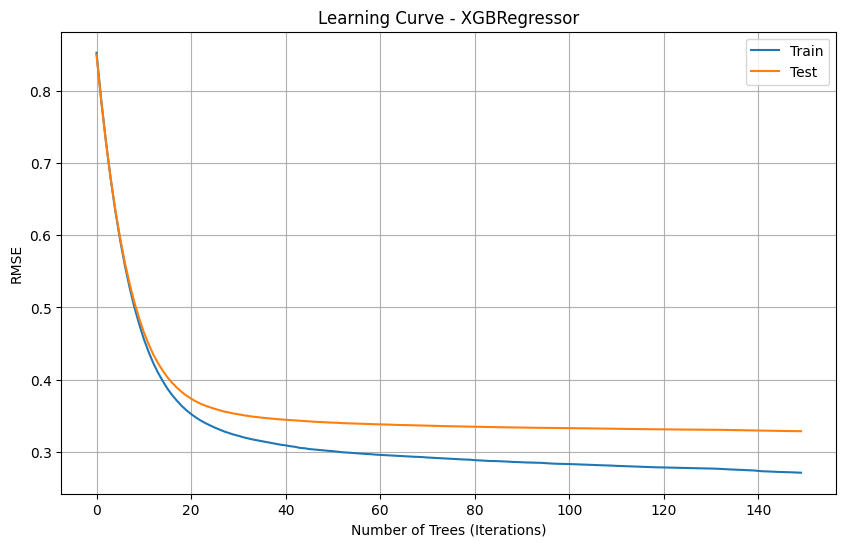

In [127]:
y = train['log_price_clipped']
X = train.drop(columns=['log_price_clipped'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# تدريب نموذج Random Forest على بيانات التدريب
xgb_model = xgb.XGBRegressor(n_estimators=150, max_depth=10, learning_rate=0.1,eval_metric="rmse",random_state=42)
xgb_model.fit(X_train, y_train)

y_test_pred = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_test_pred)
rmse_xgb = np.sqrt(mse_test)
r2_xgb = r2_score(y_test, y_test_pred)

print(f" XGBoost")
print(f" MSE:  {mse_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")

plot_learning_curve(xgb_model, X_train, y_train, X_test, y_test, metric_name="rmse")

In [119]:
y = train['log_price_clipped']
X = train.drop(columns=['log_price_clipped'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# تدريب نموذج Random Forest على بيانات التدريب
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1,random_state=42)
xgb_model.fit(X_train, y_train)

y_test_pred = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_test_pred)
rmse_xgb = np.sqrt(mse_test)
r2_xgb = r2_score(y_test, y_test_pred)

print(f" XGBoost")
print(f" MSE:  {mse_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")


 XGBoost
 MSE:  0.1109
RMSE: 0.3936
R² Score: 0.8696


In [99]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import xgboost as xgb

# البيانات
y = train['log_price_clipped']
X = train.drop(columns=['log_price_clipped'])

# إعداد K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # نموذج XGBoost
    xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)

    # التنبؤ
    y_pred = xgb_model.predict(X_test)

    # الحسابات
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# النتائج النهائية
print("XGBoost - K-Fold Cross-Validation (5 Folds)")
print(f"Average MSE:  {np.mean(mse_scores):.4f}")
print(f"Average RMSE: {np.mean(rmse_scores):.4f}")
print(f"Average R²:   {np.mean(r2_scores):.4f}")


XGBoost - K-Fold Cross-Validation (5 Folds)
Average MSE:  0.1103
Average RMSE: 0.3322
Average R²:   0.8710


In [100]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import xgboost as xgb

# البيانات
y = train['log_price_clipped']
X = train.drop(columns=['log_price_clipped'])

# إعداد K-Fold
kf = KFold(n_splits=8, shuffle=True, random_state=42)

mse_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # نموذج XGBoost
    xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)

    # التنبؤ
    y_pred = xgb_model.predict(X_test)

    # الحسابات
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# النتائج النهائية
print("XGBoost - K-Fold Cross-Validation (5 Folds)")
print(f"Average MSE:  {np.mean(mse_scores):.4f}")
print(f"Average RMSE: {np.mean(rmse_scores):.4f}")
print(f"Average R²:   {np.mean(r2_scores):.4f}")


XGBoost - K-Fold Cross-Validation (5 Folds)
Average MSE:  0.1099
Average RMSE: 0.3315
Average R²:   0.8715


XGBoost - K-Fold Cross-Validation (5 Folds)
Average MSE:  0.1070
Average RMSE: 0.3271
Average R²:   0.8749


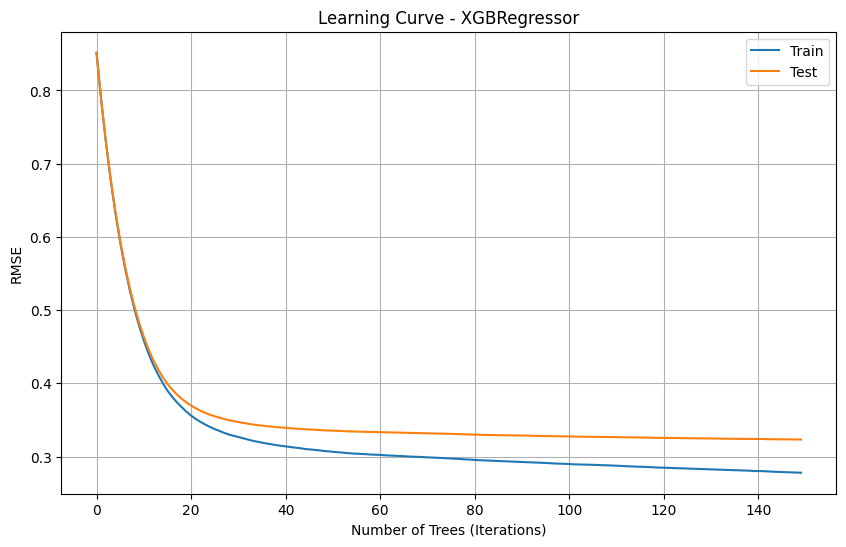

In [101]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import xgboost as xgb

# البيانات
y = train['log_price_clipped']
X = train.drop(columns=['log_price_clipped'])

# إعداد K-Fold
kf = KFold(n_splits=8, shuffle=True, random_state=42)

mse_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # نموذج XGBoost
    xgb_model = xgb.XGBRegressor(n_estimators=150, max_depth=10, learning_rate=0.1,eval_metric="rmse",random_state=42)
    xgb_model.fit(X_train, y_train)

    # التنبؤ
    y_pred = xgb_model.predict(X_test)

    # الحسابات
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# النتائج النهائية
print("XGBoost - K-Fold Cross-Validation (5 Folds)")
print(f"Average MSE:  {np.mean(mse_scores):.4f}")
print(f"Average RMSE: {np.mean(rmse_scores):.4f}")
print(f"Average R²:   {np.mean(r2_scores):.4f}")
plot_learning_curve(xgb_model, X_train, y_train, X_test, y_test, metric_name="rmse")


In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping

y = train['log_price_clipped']
X = train.drop(columns=['log_price_clipped'])
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# بناء النموذج
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
# model.add(Dropout(0.3))  # لتقليل overfitting
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(1))  # مخرجات عددية (تنبؤ السعر)

# تجميع النموذج
model.compile(optimizer='adam', loss='mse')

# Early stopping لتجنب overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# التدريب
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# التقييم على test set
y_pred_nn = model.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Test Performance:")
print(f"MSE:  {mse_nn:.4f}")
print(f"RMSE:  {rmse_nn:.4f}")
print(f"R² Score: {r2_nn:.4f}")


Epoch 1/20
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 56.2957 - val_loss: 0.5342
Epoch 2/20
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.9311 - val_loss: 1.1139
Epoch 3/20
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8643 - val_loss: 0.5186
Epoch 4/20
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8355 - val_loss: 0.4119
Epoch 5/20
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.7509 - val_loss: 0.9065
Epoch 6/20
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.7284 - val_loss: 1.2525
Epoch 7/20
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.6746 - val_loss: 0.8400
Epoch 8/20
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.6613 - val_loss: 0.4780
Epoch 9/20
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.6544 - val_loss: 0.6474
Epoch 10/20
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.6023 - val_loss: 0.5448
Epoch 11/20
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.5611 - val_loss: 0.6371
Epoch 12/20
5826/5

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping

y = train['log_price_clipped']
X = train.drop(columns=['log_price_clipped'])
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# بناء النموذج
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
# model.add(Dropout(0.3))  # لتقليل overfitting
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(1))  # مخرجات عددية (تنبؤ السعر)

# تجميع النموذج
model.compile(optimizer='adam', loss='mse')

# Early stopping لتجنب overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# التدريب
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# التقييم على test set
y_pred_nn = model.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Test Performance:")
print(f"MSE:  {mse_nn:.4f}")
print(f"RMSE:  {rmse_nn:.4f}")
print(f"R² Score: {r2_nn:.4f}")


Epoch 1/100
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 28.5140 - val_loss: 0.9912
Epoch 2/100
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.7915 - val_loss: 0.5963
Epoch 3/100
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.7305 - val_loss: 0.6680
Epoch 4/100
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.7254 - val_loss: 0.5173
Epoch 5/100
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.6799 - val_loss: 0.5546
Epoch 6/100
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.6413 - val_loss: 0.9024
Epoch 7/100
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.6355 - val_loss: 0.3543
Epoch 8/100
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.5701 - val_loss: 0.7440
Epoch 9/100
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.5888 - val_loss: 0.3282
Epoch 10/100
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.5535 - val_loss: 0.7012
Epoch 11/100
5826/5826 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.5266 - val_loss: 0.3379
Epoch 1

# 📌 Step 8: Evaluation
- Evaluate models using MAE on validation set
- Plot actual vs predicted prices
- Select the best-performing model

# 📌 Step 9: Explainability
- Use SHAP or permutation importance to identify key features

# 📌 Step 10: Predict on Test Set
- Use the trained model to predict test.csv data
- Prepare final predictions

# 📌 Step 11: Create Submission File
- Fill sample_submission.csv with predictions
- Save as submission.csv

# 📌 Step 12: Conclusion and Insights
- Discuss model performance
- Share insights about important features affecting house prices
- Reflect on limitations and possible improvements